In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install cartopy
!pip install geopy

# Data Loading and preprocessing

In [29]:
import pandas as pd

#df = pd.read_csv("(EBD) Common Kestrel (Falco tinnunculus) Spain, MERCURIO-SUMHAL.csv")
df = pd.read_csv("homing_pigeons_sample.csv")
#df = df.head(1000)

df

,Unnamed: 0,epoch,timestamp,location-long,location-lat,height-above-msl
0,0,1022831497,2002-05-31 07:51:37,8.53253,50.12359,232.0
1,1,1022831498,2002-05-31 07:51:38,8.53255,50.12359,232.0
2,2,1022831499,2002-05-31 07:51:39,8.53255,50.12359,231.0
3,3,1022831500,2002-05-31 07:51:40,8.53263,50.12364,232.0
4,4,1022831501,2002-05-31 07:51:41,8.53255,50.12378,233.0
...,...,...,...,...,...,...
9995,9995,1030950102,2002-09-02 07:01:42,8.36110,49.98210,0.0
9996,9996,1030950103,2002-09-02 07:01:43,8.36110,49.98210,0.0
9997,9997,1030950104,2002-09-02 07:01:44,8.36110,49.98210,0.0
9998,9998,1030950105,2002-09-02 07:01:45,8.36110,49.98210,0.0


In [9]:
len(df)

10000

In [31]:

ts1 = df['timestamp'].iloc[0]
ts2 = df['timestamp'].iloc[-1]

print("start time:", ts1)
print("end time:", ts2)

start time: 2002-05-31 07:51:37
end time: 2002-09-02 07:01:46


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['epoch'] = df['timestamp'].astype('int64') // 10**9

In [14]:
df.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'gps:activity-count', 'external-temperature', 'gps:dop', 'gps:hdop',
       'gps:satellite-count', 'gps-time-to-fix', 'ground-speed', 'heading',
       'height-above-msl', 'import-marked-outlier', 'gls:light-level',
       'location-error-numerical', 'manually-marked-outlier',
       'vertical-error-numerical', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name', 'epoch'],
      dtype='object')

In [16]:
df['timestamp']

0         2023-04-28 10:06:54
1         2023-04-28 10:26:55
2         2023-04-28 10:28:55
3         2023-04-28 10:31:10
4         2023-04-28 10:32:54
                  ...        
2071400   2022-03-23 09:42:30
2071401   2022-03-23 09:57:36
2071402   2022-03-23 10:13:06
2071403   2022-03-23 10:28:10
2071404   2022-03-23 10:43:05
Name: timestamp, Length: 2071405, dtype: datetime64[ns]

In [18]:
df['location-lat'].head()

0    37.427571
1    37.429683
2    37.429824
3    37.429808
4    37.429709
Name: location-lat, dtype: float64

In [20]:
df = df[['epoch','timestamp','location-long','location-lat','height-above-msl']]

In [87]:
df.head()

,Unnamed: 0,epoch,timestamp,location-long,location-lat,height-above-msl
0,0,1022831497,2002-05-31 07:51:37,8.53253,50.12359,232.0
1,1,1022831498,2002-05-31 07:51:38,8.53255,50.12359,232.0
2,2,1022831499,2002-05-31 07:51:39,8.53255,50.12359,231.0
3,3,1022831500,2002-05-31 07:51:40,8.53263,50.12364,232.0
4,4,1022831501,2002-05-31 07:51:41,8.53255,50.12378,233.0


# Visualizations and EDA

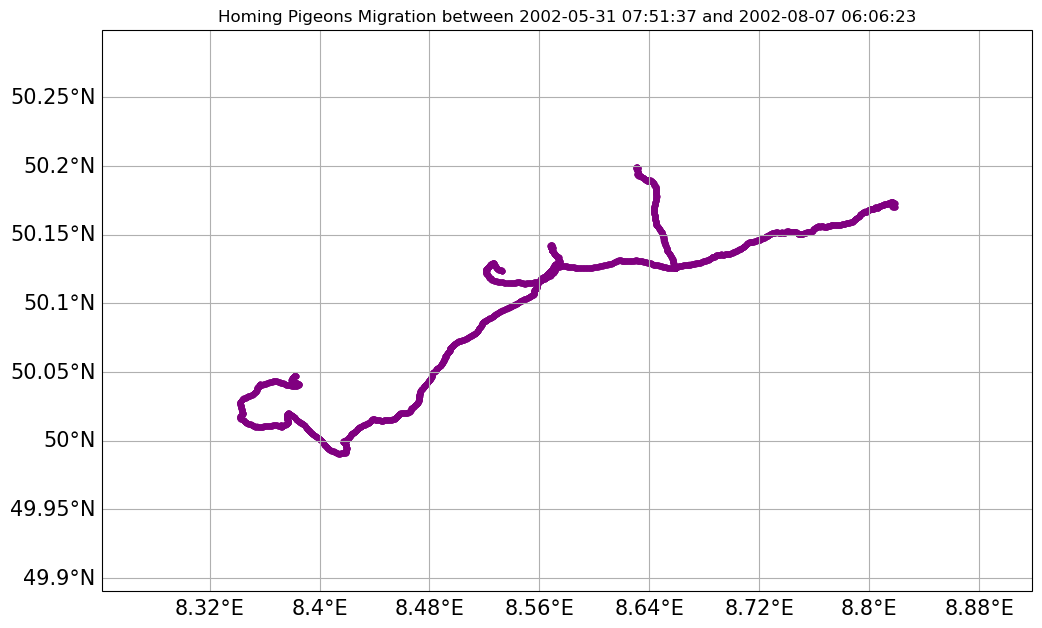

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the plot
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add ocean with light blue color
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1)
ax.add_feature(cfeature.COASTLINE)

# Plot the points
plt.scatter(df['location-long'], df['location-lat'], color='purple', s=10, transform=ccrs.PlateCarree())

# Add labels for the points
for x, y in zip(df['location-long'], df['location-lat']):
    plt.text(x, y, '', fontsize=12, ha='right', transform=ccrs.PlateCarree())

# Set the title
plt.title('Homing Pigeons Migration between ' + ts1 + ' and ' + ts2 + '')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add gridlines with labels in simple format
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

gl.xlocator = plt.MaxNLocator(integer=True)
gl.ylocator = plt.MaxNLocator(integer=True)

gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

# Zoom out by setting extent
lon_min, lon_max = df['location-long'].min() - 0.1, df['location-long'].max() + 0.1
lat_min, lat_max = df['location-lat'].min() - 0.1, df['location-lat'].max() + 0.1
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Show the plot
plt.show()

In [13]:
fig.savefig('4_Sample_migration.png', dpi=300, bbox_inches='tight')

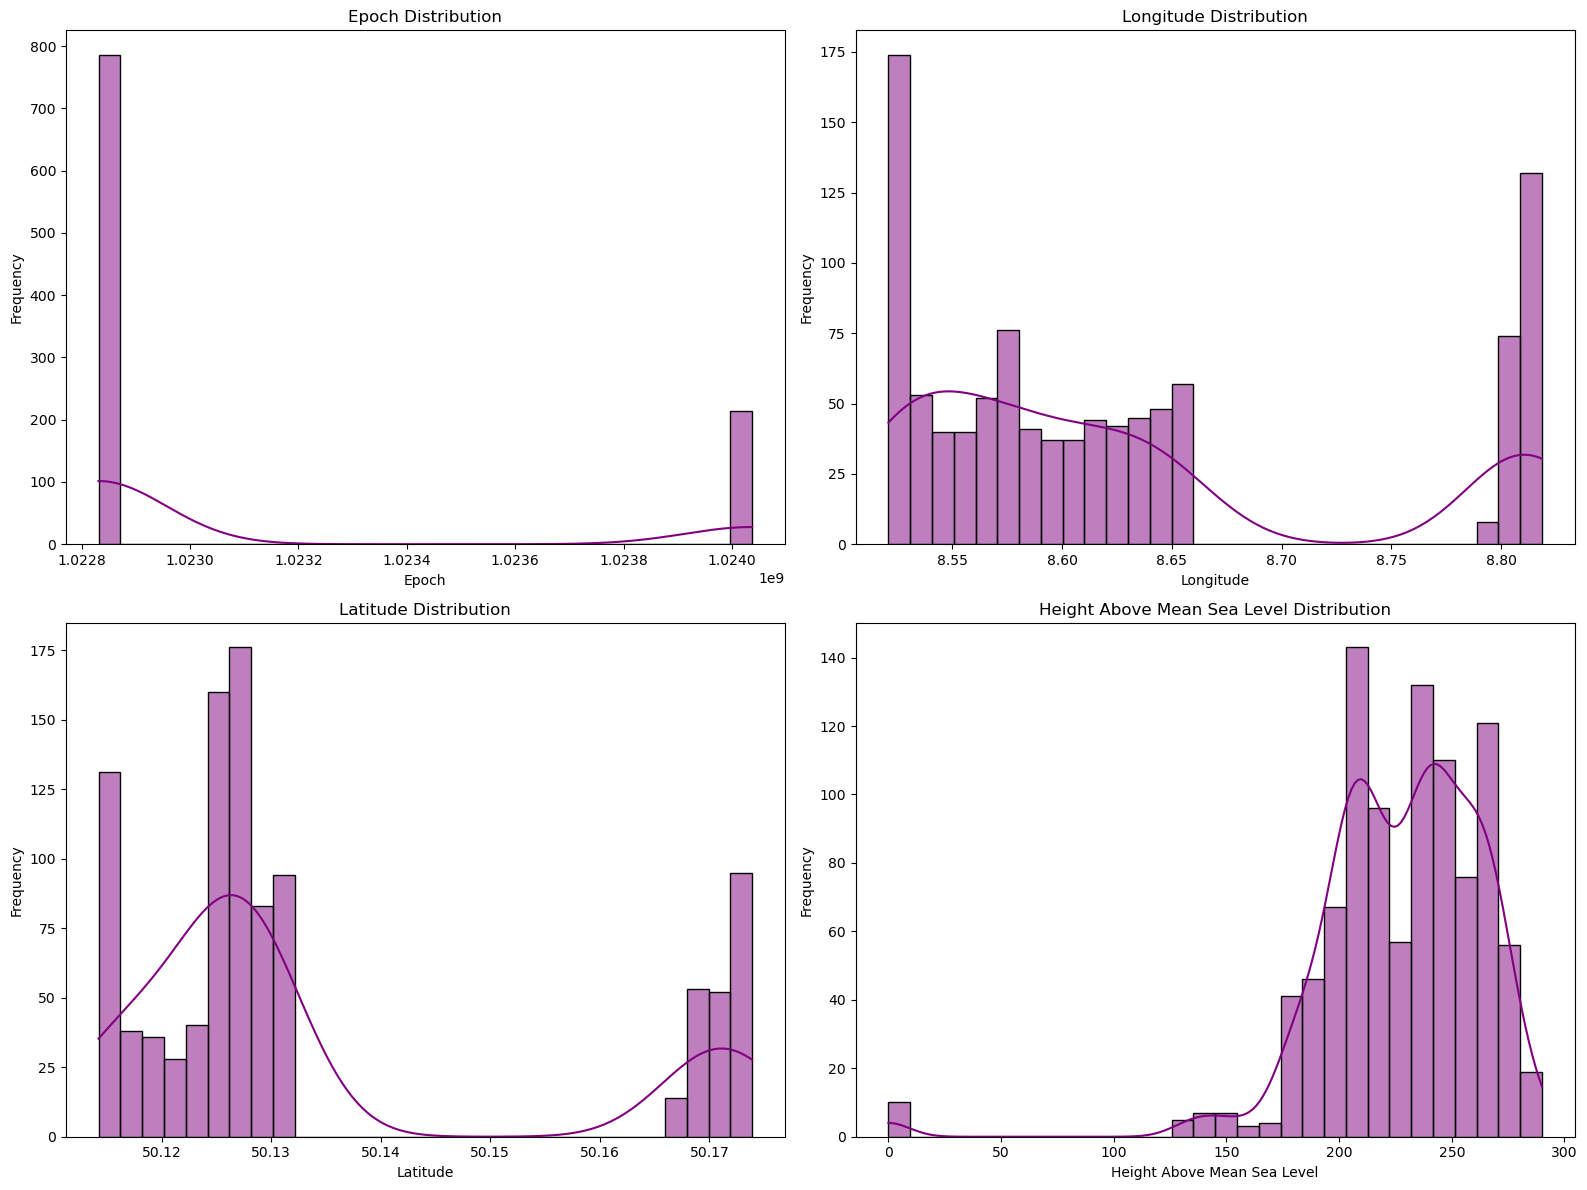

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(1000)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for epoch
sns.histplot(df['epoch'], bins=30,color='purple', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Epoch Distribution')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Frequency')

# Plot for location-long (Longitude)
sns.histplot(df['location-long'], bins=30,color='purple', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Longitude Distribution')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Frequency')

# Plot for location-lat (Latitude)
sns.histplot(df['location-lat'], bins=30,color='purple', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Latitude Distribution')
axes[1, 0].set_xlabel('Latitude')
axes[1, 0].set_ylabel('Frequency')

# Plot for height-above-msl
sns.histplot(df['height-above-msl'], bins=30,color='purple', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Height Above Mean Sea Level Distribution')
axes[1, 1].set_xlabel('Height Above Mean Sea Level')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [127]:
fig.savefig('4_distributions.png')

In [33]:

# Sort the dataframe by epoch in ascending order
df_sorted = df.sort_values(by='epoch').reset_index(drop=True)

# Calculate the delta time in seconds using the epoch column
df_sorted['delta'] = df_sorted['epoch'].diff()

# Set the first delta value to 0
df_sorted.loc[0, 'delta'] = 0

In [11]:
df_sorted.head()

,Unnamed: 0,epoch,timestamp,location-long,location-lat,height-above-msl,delta
0,0,1022831497,2002-05-31 07:51:37,8.53253,50.12359,232.0,0.0
1,1,1022831498,2002-05-31 07:51:38,8.53255,50.12359,232.0,1.0
2,2,1022831499,2002-05-31 07:51:39,8.53255,50.12359,231.0,1.0
3,3,1022831500,2002-05-31 07:51:40,8.53263,50.12364,232.0,1.0
4,4,1022831501,2002-05-31 07:51:41,8.53255,50.12378,233.0,1.0


In [250]:
df_sorted["delta"]

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Name: delta, Length: 10000, dtype: float64

In [252]:
# Display the summary statistics
print("Summary Statistics for Delta Time:")
print(df_sorted["delta"].describe())


Summary Statistics for Delta Time:
count    1.000000e+04
mean     8.118609e+02
std      5.029832e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.324459e+06
Name: delta, dtype: float64


In [37]:
# Calculate the first and third quartiles (Q1, Q3) and IQR
Q1 = df_sorted['delta'].quantile(0.25)
Q3 = df_sorted['delta'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_pruned = df_sorted[(df_sorted['delta'] >= lower_bound) & (df_sorted['delta'] <= upper_bound)]


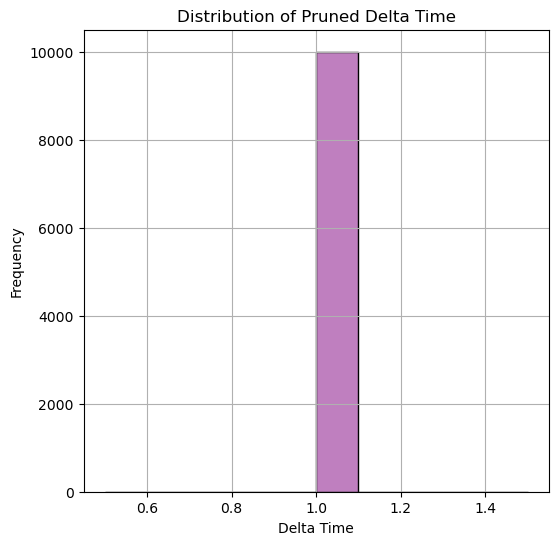

In [39]:
# Plot the distribution of the pruned delta with grid
fig1 = plt.figure(figsize=(6, 6))
#plt.figure(figsize=(10, 6))
sns.histplot(df_pruned['delta'], bins=10,color='purple', kde=True)
plt.title('Distribution of Pruned Delta Time')
plt.xlabel('Delta Time')
plt.ylabel('Frequency')
#plt.ylim(0, 0.2)
plt.grid(True)
plt.show()

In [189]:
fig1.savefig('4_distributions_delta_epoch.png')

In [41]:
import numpy as np
# Haversine formula to calculate the horizontal distance between two points on the Earth
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    a = np.sin(delta_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * \
        np.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c * 1000  # Convert distance to meters
    return distance

# Function to calculate 3D distance 
def calculate_3d_distance(lat1, lon1, msl1, lat2, lon2, msl2):
    horizontal_distance = haversine(lat1, lon1, lat2, lon2)
    vertical_distance = msl2 - msl1
    distance_3d = np.sqrt(horizontal_distance**2 + vertical_distance**2)
    return distance_3d

# Calculate the 3D distance between each record and the previous one
df_sorted['distance'] = df_sorted.apply(
    lambda row: calculate_3d_distance(
        df_sorted.loc[row.name - 1, 'location-lat'], df_sorted.loc[row.name - 1, 'location-long'], df_sorted.loc[row.name - 1, 'height-above-msl'],
        row['location-lat'], row['location-long'], row['height-above-msl']
    ) if row.name > 0 else 0,
    axis=1
)

In [42]:
df_sorted

,Unnamed: 0,epoch,timestamp,location-long,location-lat,height-above-msl,delta,distance
0,0,1022831497,2002-05-31 07:51:37,8.53253,50.12359,232.0,0.0,0.000000
1,1,1022831498,2002-05-31 07:51:38,8.53255,50.12359,232.0,1.0,1.425816
2,2,1022831499,2002-05-31 07:51:39,8.53255,50.12359,231.0,1.0,1.000000
3,3,1022831500,2002-05-31 07:51:40,8.53263,50.12364,232.0,1.0,8.027327
4,4,1022831501,2002-05-31 07:51:41,8.53255,50.12378,233.0,1.0,16.609262
...,...,...,...,...,...,...,...,...
9995,9995,1030950102,2002-09-02 07:01:42,8.36110,49.98210,0.0,1.0,0.000000
9996,9996,1030950103,2002-09-02 07:01:43,8.36110,49.98210,0.0,1.0,0.000000
9997,9997,1030950104,2002-09-02 07:01:44,8.36110,49.98210,0.0,1.0,0.000000
9998,9998,1030950105,2002-09-02 07:01:45,8.36110,49.98210,0.0,1.0,0.000000


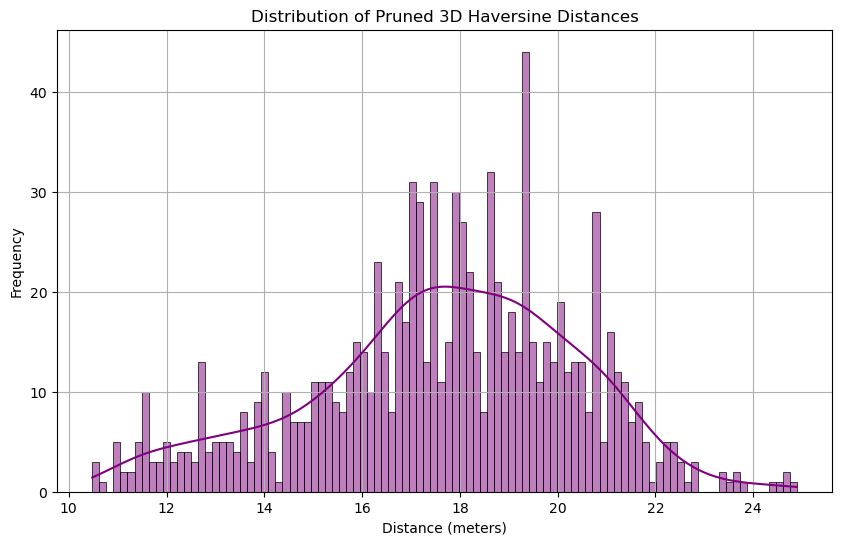

In [17]:
# Calculate the first and third quartiles (Q1, Q3) and IQR for the distance column
Q1_distance = df_sorted['distance'].quantile(0.25)
Q3_distance = df_sorted['distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

# Define the lower and upper bounds for outliers
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

# Filter out the outliers
df_pruned_distance = df_sorted[(df_sorted['distance'] >= lower_bound_distance) & (df_sorted['distance'] <= upper_bound_distance)]

# Plot the distribution of the pruned 3D distances
plt.figure(figsize=(10, 6))
sns.histplot(df_pruned_distance['distance'], color='purple',bins=100, kde=True)
plt.title('Distribution of Pruned 3D Haversine Distances')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
plt.savefig('4_distributions_delta_epoch.png')

<Figure size 640x480 with 0 Axes>

2002-05-31 07:51:37  :  2002-05-31 07:56:37  -  300  -  60
2002-05-31 07:56:37  :  2002-05-31 08:01:37  -  300  -  60
2002-05-31 08:01:37  :  2002-05-31 08:06:37  -  150  -  60


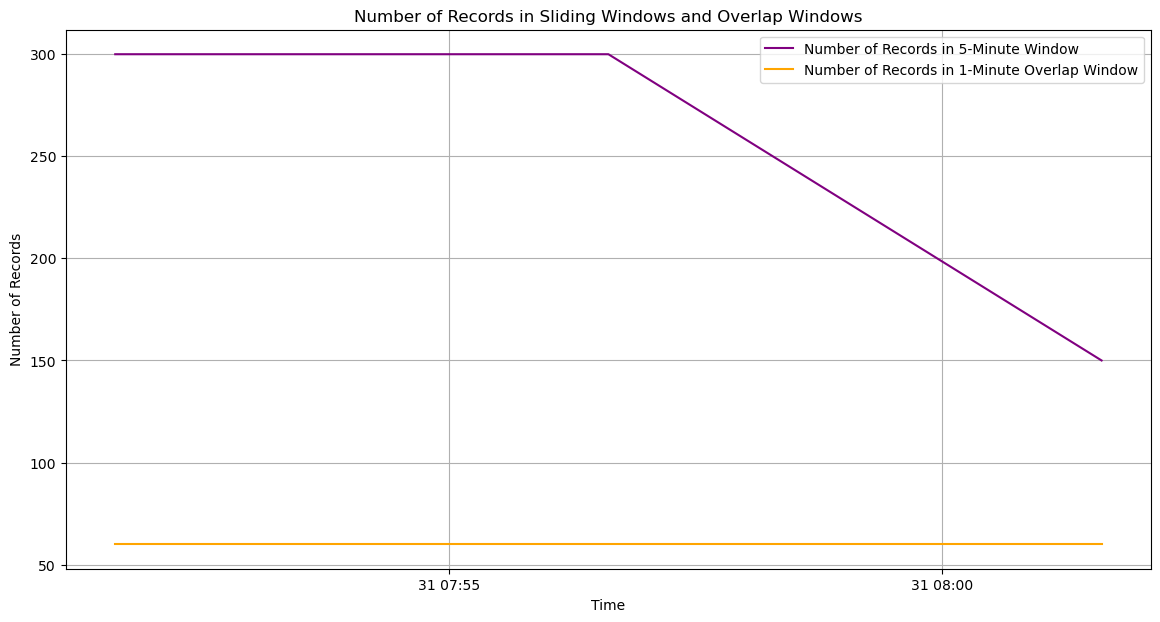

In [160]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)
df_sorted = df_sorted.head(750)

# Define the sliding window and overlap in seconds
window_size = 5 * 60  # 10 minutes in seconds
overlap_size = 1 * 60  # 2 minutes in seconds

# Lists to hold the number of records in each window and overlap window
window_counts = []
overlap_counts = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Number of records in the current window
    window_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)].shape[0]
    window_counts.append(window_count)

    # Number of records in the overlap window
    overlap_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)].shape[0]
    overlap_counts.append(overlap_count)
    print(start_time , " : " , window_end_time, " - ", window_count, " - ", overlap_count)
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)

# Create a time axis for the x-axis
time_axis = [df_sorted['timestamp'].min() + pd.Timedelta(seconds=window_size * i) for i in range(len(window_counts))]

# Plot the results
fig9 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_counts, label='Number of Records in 5-Minute Window', color='purple')
plt.plot(time_axis, overlap_counts, label='Number of Records in 1-Minute Overlap Window', color='orange')
plt.title('Number of Records in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.legend()
#plt.ylim(0,50)
plt.grid(True)
plt.show()

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 1 * 60  # 60 minutes in seconds
overlap_size = 0.2 * 60  # 20 minutes in seconds

# Lists to hold the number of records in each window and overlap window
window_counts = []
overlap_counts = []
time_axis = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Number of records in the current window
    window_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)].shape[0]

    # Number of records in the overlap window
    overlap_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)].shape[0]

    if window_count > 0 or overlap_count > 0:
        print(start_time , " : " , window_end_time, " - ", window_count, " - ", overlap_count)
        window_counts.append(window_count)
        overlap_counts.append(overlap_count)
        time_axis.append(start_time)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)

# Plot the results
fig9 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_counts, label='Number of Records in 5-Minute Window', color='purple')
plt.plot(time_axis, overlap_counts, label='Number of Records in 1-Minute Overlap Window', color='orange')
plt.title('Number of Records in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()


2002-05-31 07:51:37  :  2002-05-31 07:52:37  -  60  -  12
2002-05-31 07:52:37  :  2002-05-31 07:53:37  -  60  -  12
2002-05-31 07:53:37  :  2002-05-31 07:54:37  -  60  -  12
2002-05-31 07:54:37  :  2002-05-31 07:55:37  -  60  -  12
2002-05-31 07:55:37  :  2002-05-31 07:56:37  -  60  -  12
2002-05-31 07:56:37  :  2002-05-31 07:57:37  -  60  -  12
2002-05-31 07:57:37  :  2002-05-31 07:58:37  -  60  -  12
2002-05-31 07:58:37  :  2002-05-31 07:59:37  -  60  -  12
2002-05-31 07:59:37  :  2002-05-31 08:00:37  -  60  -  12
2002-05-31 08:00:37  :  2002-05-31 08:01:37  -  60  -  12
2002-05-31 08:01:37  :  2002-05-31 08:02:37  -  60  -  12
2002-05-31 08:02:37  :  2002-05-31 08:03:37  -  60  -  12
2002-05-31 08:03:37  :  2002-05-31 08:04:37  -  60  -  12
2002-05-31 08:04:37  :  2002-05-31 08:05:37  -  6  -  6
2002-06-14 06:44:37  :  2002-06-14 06:45:37  -  47  -  0
2002-06-14 06:45:37  :  2002-06-14 06:46:37  -  60  -  12
2002-06-14 06:46:37  :  2002-06-14 06:47:37  -  60  -  12
2002-06-14 06:47:

KeyboardInterrupt: 

In [51]:
fig9.savefig('4_Number of Records in Sliding Windows and Overlap Windows.png', dpi=300, bbox_inches='tight')

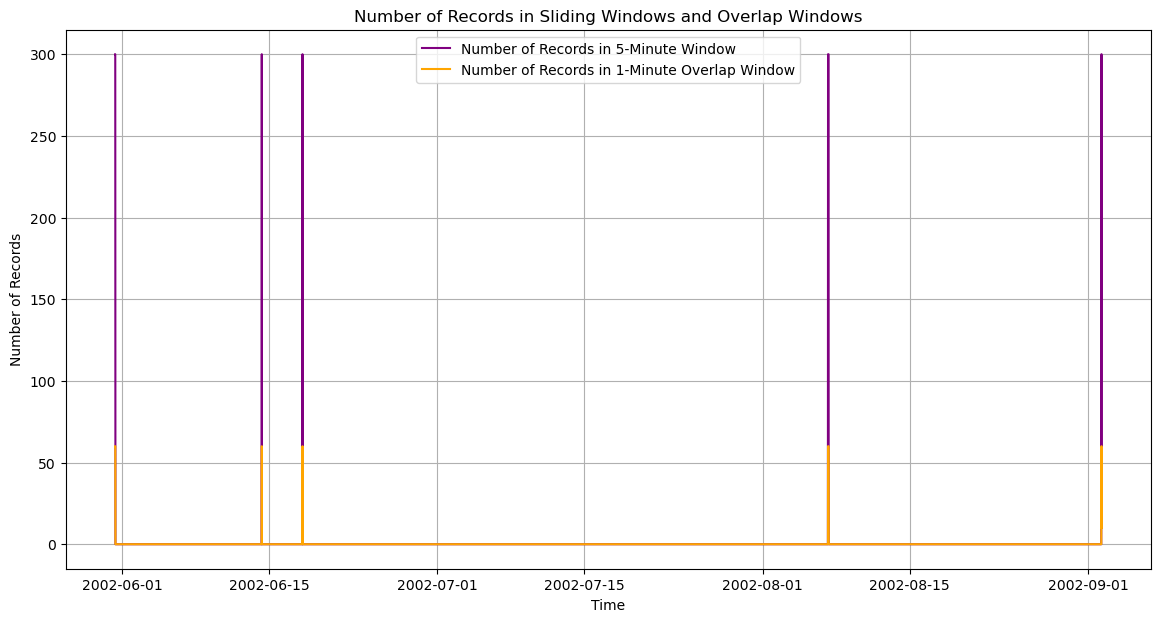

In [47]:
# Plot the results
fig9 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_counts, label='Number of Records in 5-Minute Window', color='purple')
plt.plot(time_axis, overlap_counts, label='Number of Records in 1-Minute Overlap Window', color='orange')
plt.title('Number of Records in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()
fig9.savefig('4_4Number of Records in Sliding Windows and Overlap Windows.png', dpi=300, bbox_inches='tight')

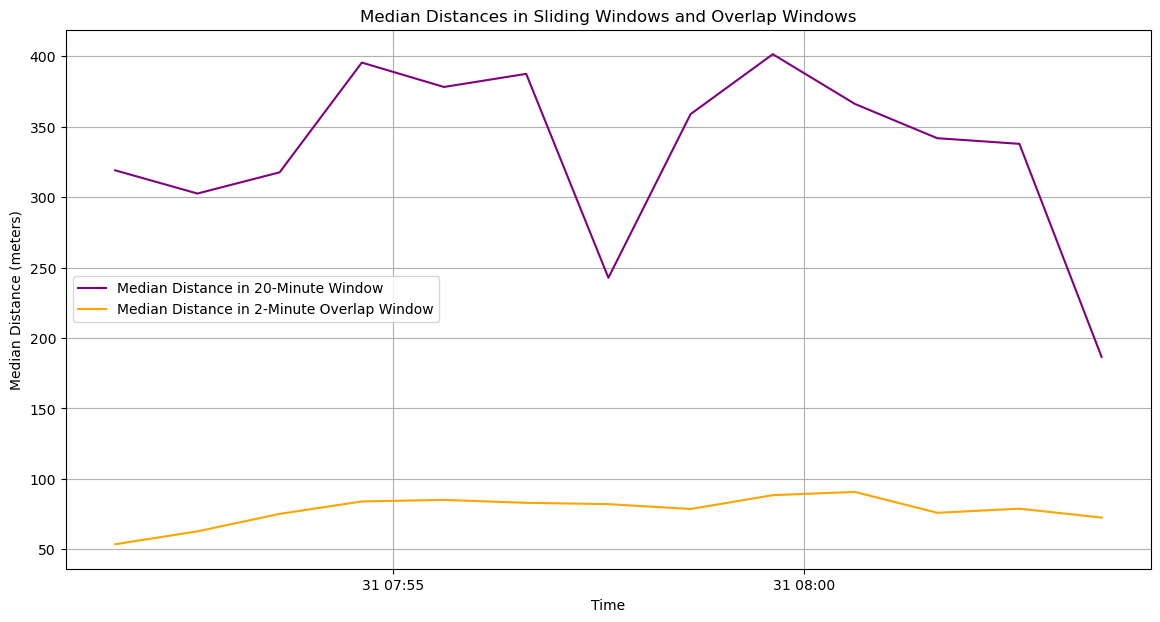

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000
    return (c * r) + abs(alt1 - alt2)

def average_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.mean(distances)

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(750)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 1 * 60  # 1 minute in seconds
overlap_size = 0.2 * 60  # 0.2 minutes in seconds

# Lists to hold the average distances in each window and overlap window
window_avg_distances = []
overlap_avg_distances = []
time_axis = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Points in the current window
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    window_coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
    window_avg_distance = average_distance(window_coords)

    # Points in the overlap window
    overlap_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)]
    overlap_coords = overlap_df[['location-long', 'location-lat', 'height-above-msl']].values
    overlap_avg_distance = average_distance(overlap_coords)

    # Only append if the average distance is not zero
    if window_avg_distance > 0 or overlap_avg_distance > 0:
        window_avg_distances.append(window_avg_distance)
        overlap_avg_distances.append(overlap_avg_distance)
        time_axis.append(start_time)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)

# Plot the results
fig10 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_avg_distances, label='Median Distance in 20-Minute Window', color='purple')
plt.plot(time_axis, overlap_avg_distances, label='Median Distance in 2-Minute Overlap Window', color='orange')
plt.title('Median Distances in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
plt.legend()
plt.grid(True)
plt.show()


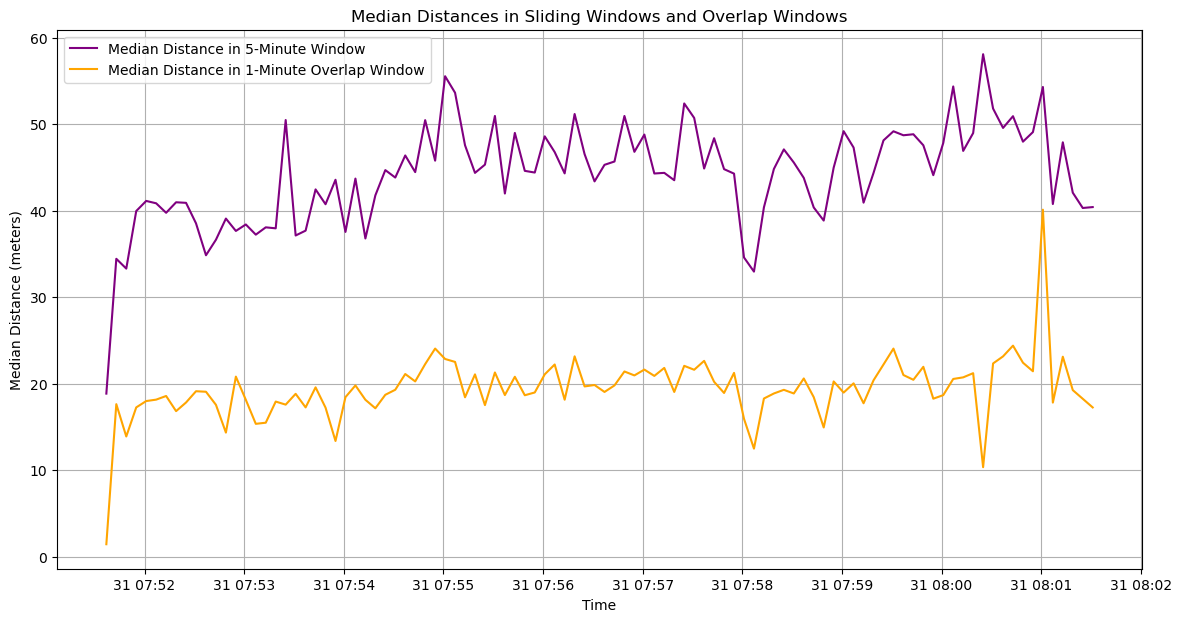

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000
    return c * r + abs(alt1 - alt2)

def average_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.mean(distances)

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(750)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 0.1 * 60  # 10 minutes in seconds
overlap_size = 0.02 * 60  # 2 minutes in seconds

# Lists to hold the average distances in each window and overlap window
window_avg_distances = []
overlap_avg_distances = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

# Initialize a counter for windows
window_counter = 0

while start_time <= end_time and window_counter < 100:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Points in the current window
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    window_coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
    window_avg_distance = average_distance(window_coords)
    window_avg_distances.append(window_avg_distance)

    # Points in the overlap window
    overlap_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)]
    overlap_coords = overlap_df[['location-long', 'location-lat', 'height-above-msl']].values
    overlap_avg_distance = average_distance(overlap_coords)
    overlap_avg_distances.append(overlap_avg_distance)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)
    window_counter += 1

# Ensure both lists are of the same size by appending zeros to the smaller list
max_length = max(len(window_avg_distances), len(overlap_avg_distances))
while len(window_avg_distances) < max_length:
    window_avg_distances.append(0)
while len(overlap_avg_distances) < max_length:
    overlap_avg_distances.append(0)

# Create a time axis for the x-axis
time_axis = [df_sorted['timestamp'].min() + pd.Timedelta(seconds=window_size * i) for i in range(max_length)]

# Plot the results
fig10 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_avg_distances, label='Median Distance in 5-Minute Window', color='purple')
plt.plot(time_axis, overlap_avg_distances, label='Median Distance in 1-Minute Overlap Window', color='orange')
plt.title('Median Distances in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
#plt.ylim(0, 2700)  # Set y-axis limit to 50000 meters
plt.legend()
plt.grid(True)
plt.show()


In [302]:
fig10.savefig('4_Number of Records in Sliding Windows and Overlap Windows_blue.png', dpi=300, bbox_inches='tight')

In [49]:
fig11.savefig('Number of Records in Sliding Windows and Overlap Windows_yellow.png', dpi=300, bbox_inches='tight')

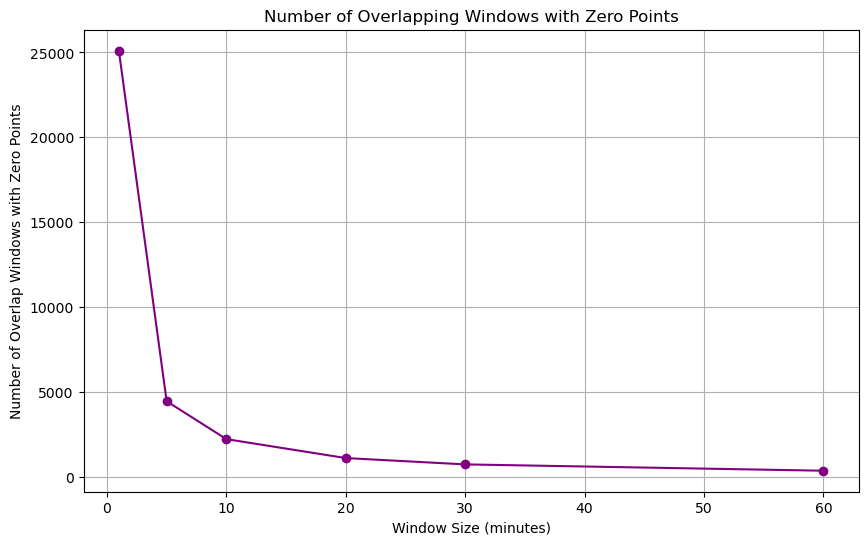

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the number of overlap windows with zero points
def calculate_overlap_windows_with_zero_points(df, data_start, data_end, window_size, step_size):
    num_windows_with_zero_points = 0
    current_start = data_start
    while current_start + window_size <= data_end:
        window_end = current_start + window_size
        window_df = df[(df['timestamp'] >= current_start) & (df['timestamp'] < window_end)]
        if window_df.empty:
            num_windows_with_zero_points += 1
        current_start += step_size
    return num_windows_with_zero_points

# Define the window and overlap sizes in minutes
window_sizes = [1,5,10,20,30,60]  # in minutes
overlap_sizes = [0.2,0.5,1,2,3,6]  # in minutes

# Convert minutes to seconds
window_sizes_seconds = [ws * 60 for ws in window_sizes]
overlap_sizes_seconds = [os * 60 for os in overlap_sizes]

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(1000)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Get the start and end times from the dataset
data_start = df['timestamp'].min()
data_end = df['timestamp'].max()

# Calculate the number of overlap windows with zero points for each window and overlap size
zero_point_windows = []
for ws, os in zip(window_sizes_seconds, overlap_sizes_seconds):
    step_size = ws - os
    num_zero_point_windows = calculate_overlap_windows_with_zero_points(df, data_start, data_end, pd.Timedelta(seconds=ws), pd.Timedelta(seconds=step_size))
    zero_point_windows.append(num_zero_point_windows)

# Plot the results
figure_knee = plt.figure(figsize=(10, 6))
plt.plot(window_sizes, zero_point_windows, marker='o', linestyle='-', color='purple')
plt.title('Number of Overlapping Windows with Zero Points')
plt.xlabel('Window Size (minutes)')
plt.ylabel('Number of Overlap Windows with Zero Points')
plt.grid(True)
plt.show()


In [105]:
figure_knee.savefig('win_size_knee.png', dpi=300, bbox_inches='tight')

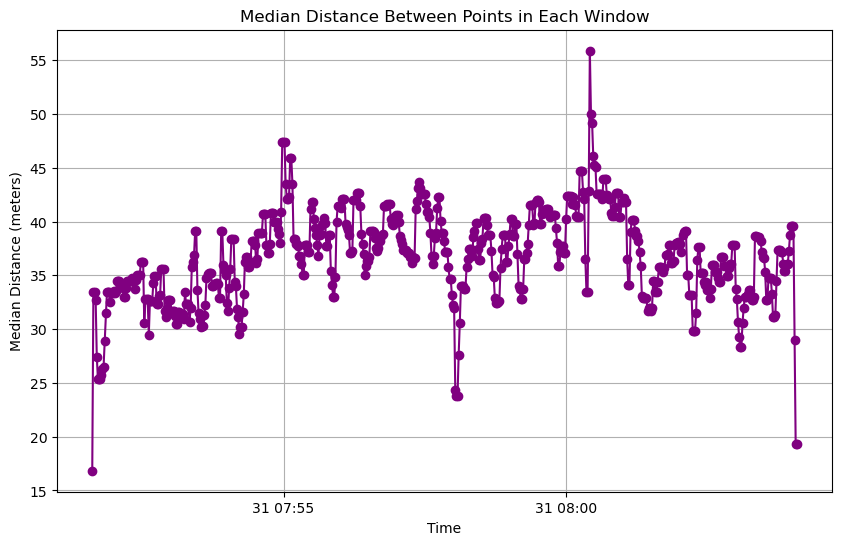

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000  # Radius of Earth in meters
    distance = c * r
    
    alt_diff = abs(alt1 - alt2)
    
    return np.sqrt(distance**2 + alt_diff**2)

def calculate_median_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.median(distances)

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(750)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and step size in seconds
window_size = 0.1 * 60  # 10 minutes in seconds
step_size = 0.02 * 60  # 2 minutes in seconds

# Lists to hold the median distances and corresponding times
median_distances = []
time_labels = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    
    if len(window_df) > 1:
        coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
        median_distance = calculate_median_distance(coords)
        median_distances.append(median_distance)
        time_labels.append(start_time)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_labels, median_distances, marker='o', linestyle='-', color='purple')
plt.title('Median Distance Between Points in Each Window')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
#plt.ylim(0, 1000)  # Set y-axis limit to 50000 meters
plt.grid(True)
plt.show()


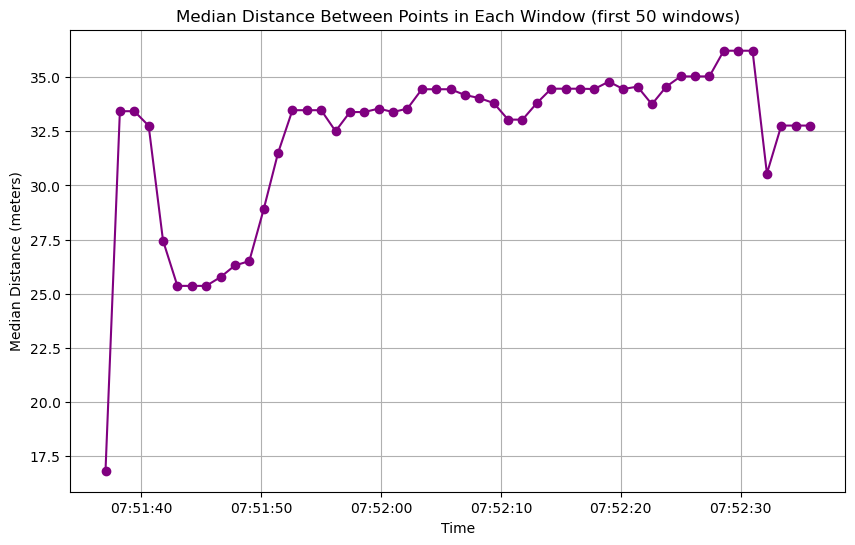

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000  # Radius of Earth in meters
    distance = c * r
    
    alt_diff = abs(alt1 - alt2)
    
    return np.sqrt(distance**2 + alt_diff**2)

def calculate_median_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.median(distances)

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
#df = df.head(1000)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and step size in seconds
window_size = 0.1 * 60  # 60 minutes in seconds
step_size = 0.02 * 60  # 20 minutes in seconds

# Lists to hold the median distances and corresponding times
median_distances = []
time_labels = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

# Initialize a counter for windows
window_counter = 0

while start_time <= end_time and window_counter < 50:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    
    if len(window_df) > 1:
        coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
        median_distance = calculate_median_distance(coords)
        median_distances.append(median_distance)
        time_labels.append(start_time)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    
    # Increment the window counter
    window_counter += 1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_labels, median_distances, marker='o', linestyle='-', color='purple')
plt.title('Median Distance Between Points in Each Window (first 50 windows)')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
#plt.ylim(0, 1000)  # Set y-axis limit to 1000 meters
plt.grid(True)
plt.show()


In [140]:
figure_eps_1000.savefig('figure_eps_1000.png', dpi=300, bbox_inches='tight')

# Running the Algorithm

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from geopy.distance import geodesic
import itertools

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(750)
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 1 * 60  # 60 minutes in seconds
step_size = 0.2 * 60  # 20 minutes in seconds

def haversine(coord1, coord2):
    """
    Calculate the haversine distance between two coordinates, including altitude.
    """
    lon1, lat1, alt1 = coord1
    lon2, lat2, alt2 = coord2
    
    # Haversine distance
    r = 6371000  # Radius of Earth in meters
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = r * c
    
    # Add altitude difference
    alt_diff = abs(alt1 - alt2)
    
    return np.sqrt(distance**2 + alt_diff**2)

def calculate_centroid(points):
    """
    Calculate the centroid of a cluster of points.
    """
    mn = np.mean(points, axis=0)
    #print("centroid = ", mn)
    return mn

def get_max_dist_in_cluster(cluster):
    max_dist_in_cluster = 0
    for p1, p2 in itertools.combinations(cluster[['location-long', 'location-lat', 'height-above-msl']].values, 2):
        dist = haversine(p1, p2)
        max_dist_in_cluster = max(max_dist_in_cluster, dist)
        #print(f"Distance between points {p1} and {p2}: {dist} meters")
    return max_dist_in_cluster

def get_min_dist_in_cluster(cluster):
    min_dist_in_cluster = 0
    for p1, p2 in itertools.combinations(cluster[['location-long', 'location-lat', 'height-above-msl']].values, 2):
        dist = haversine(p1, p2)
        min_dist_in_cluster = min(min_dist_in_cluster, dist)
        #print(f"Distance between points {p1} and {p2}: {dist} meters")
    print("min_dist_in_cluster ", min_dist_in_cluster)
    return min_dist_in_cluster

def process_window(df_window, initial_eps=200,withDynamicEPS=True):
    """
    Process a data window using DBSCAN clustering.
    Adjust the eps parameter until the condition is met and calculate metrics for each cluster.
    """
    curr_eps = initial_eps
    min_dist_between_centroids = np.inf
    min_dist_between_points =  np.inf
    
    while True:
        # Perform DBSCAN clustering
        db = DBSCAN(eps=curr_eps, min_samples=3, metric=lambda a, b: haversine(a[:3], b[:3])).fit(df_window[['location-long', 'location-lat', 'height-above-msl']])
        labels = db.labels_
        unique_labels = set(labels)
        print(unique_labels)
        
         # If there is only one label and it's -1 (noise), return an empty DataFrame
        if len(unique_labels) == 1 and -1 in unique_labels:
            return pd.DataFrame(), curr_eps
        
        # Calculate centroids of clusters
        cluster_points = [df_window[labels == label] for label in unique_labels if label != -1]
        centroids = [calculate_centroid(cluster[['location-long', 'location-lat', 'height-above-msl']].values) for cluster in cluster_points]

        #min_dist_between_centroids = np.inf
        #min_dist_between_points = np.inf
        
        # Calculate the minimum distance between centroids of closest clusters
        for i, j in itertools.combinations(range(len(centroids)), 2):
            dist = haversine(centroids[i], centroids[j])
            #print("dist ",dist)
            if dist < min_dist_between_centroids:
                min_dist_between_centroids = dist
        #print("min_dist_between_centroids ",min_dist_between_centroids)
        
        # Calculate the minimum distance between the closest points of the clusters
        for cluster1, cluster2 in itertools.combinations(cluster_points, 2):
            for p1 in cluster1[['location-long', 'location-lat', 'height-above-msl']].values:
                for p2 in cluster2[['location-long', 'location-lat', 'height-above-msl']].values:
                    dist = haversine(p1, p2)
                    #print("dist ",dist)
                    if dist < min_dist_between_points:
                        min_dist_between_points = dist
        #print("min_dist_between_points ",min_dist_between_points)
        
        # If the condition is met, calculate metrics and return the results
        #if max_dist_in_smallest_cluster < min_dist_between_clusters:
        if min_dist_between_points <= min_dist_between_centroids:
            if min_dist_between_centroids != np.inf:
                curr_eps = min_dist_between_centroids
            print(curr_eps)
            #print("min_dist_between_points", min_dist_between_points)
            #print("min_dist_between_centroids ",min_dist_between_centroids)
            result = []
            for cluster_label in unique_labels:
                print(cluster_label)
                if cluster_label == -1:
                    continue
                cluster_df = df_window[labels == cluster_label]
                #print("len(centroids): ", len(centroids))
                #print("len ",len(cluster_df))
                silhouette_avg = silhouette_score(df_window[['location-long', 'location-lat', 'height-above-msl']], labels) if len(set(labels)) > 1 else -1
                davies_bouldin = davies_bouldin_score(df_window[['location-long', 'location-lat', 'height-above-msl']], labels) if len(set(labels)) > 1 else -1
                calinski_harabasz = calinski_harabasz_score(df_window[['location-long', 'location-lat', 'height-above-msl']], labels) if len(set(labels)) > 1 else -1
                #min_dist_to_closest_cluster = min_dist_between_points
                max_dist_in_cluster = get_max_dist_in_cluster(cluster_df)
                min_dist_in_cluster = get_min_dist_in_cluster(cluster_df)
                first_timestamp = cluster_df['timestamp'].min()
                last_timestamp = cluster_df['timestamp'].max()
                cluster_size = len(cluster_df)
                points = cluster_df[['epoch','location-long', 'location-lat', 'height-above-msl']].values.tolist()
                
                result.append({
                    'cluster_label': cluster_label,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_score': davies_bouldin,
                    'calinski_harabasz_score': calinski_harabasz,
                    'clusters_in_window': len(unique_labels),
                    'win_eps': curr_eps,
                    'min_dist_between_points': min_dist_between_points,
                    'min_dist_between_centroids':min_dist_between_centroids,
                    'max_dist_in_cluster': max_dist_in_cluster,
                    'min_dist_in_cluster': min_dist_in_cluster,
                    'first_timestamp': first_timestamp,
                    'last_timestamp': last_timestamp,
                    'win_number': None,  # This will be updated later
                    'cluster_size': cluster_size,
                    'points': points
                })
                #min_dist_between_centroids = np.inf
                #min_dist_between_points = np.inf 
                
            return pd.DataFrame(result),curr_eps
        
        # Reduce the eps value by 10% and rerun DBSCAN
        if withDynamicEPS:
            curr_eps *= 0.9
        #print(curr_eps)

    return pd.DataFrame(result),curr_eps

# Initialize dataframe to hold the results
all_clusters = pd.DataFrame()

# Iterate through the data in sliding windows
window_number = 0
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()
curr_eps = 20
print("------------starting DBSCAN windows process:------------")

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    #print(f"Processing window {window_number}: Start Time = {start_time}, End Time = {window_end_time}, Points in Window = {len(window_df)}")
    
    # Process the window if it has more than one point
    if len(window_df) > 1:
        clusters_df,curr_eps = process_window(window_df,20,True)
        clusters_df['win_number'] = window_number
        clusters_df['Selected EPS'] = curr_eps
        all_clusters = pd.concat([all_clusters, clusters_df], ignore_index=True)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    window_number += 1

#print(all_clusters)


------------starting DBSCAN windows process:------------


In [5]:
# Initialize dataframe to hold the results
all_clusters_no_overlap_static_eps = pd.DataFrame()

# Iterate through the data in sliding windows
window_number = 0
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()
curr_eps = 20
# Define the sliding window and overlap in seconds
window_size = 1 * 60  # 60 minutes in seconds
step_size = 0.2 * 60  # 20 minutes in seconds

print("------------starting DBSCAN windows process:------------")

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    #print(f"Processing window {window_number}: Start Time = {start_time}, End Time = {window_end_time}, Points in Window = {len(window_df)}")
    
    # Process the window if it has more than one point
    if len(window_df) > 1:
        clusters_df,curr_eps = process_window(window_df,20,False)
        clusters_df['win_number'] = window_number
        clusters_df['Selected EPS'] = curr_eps
        all_clusters_no_overlap_static_eps = pd.concat([all_clusters_no_overlap_static_eps, clusters_df], ignore_index=True)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    window_number += 1

#print(all_clusters)
all_clusters_no_overlap_static_eps.to_csv("clusters_file4_no_overlap_static_eps.csv")

------------starting DBSCAN windows process:------------
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0, 1}
421.1397711555982
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
{0, 1}
427.4338111034467
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
{0, 1, 2, -1}
249.90636551934892
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, -1}
324.44878080247304
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, -1}
243.81195396339476
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, -1}
308.13946784200266
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, 3, 4, -1}
103.94620313933612
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
3
min_dist_in_cluster  0
4
min_dist_in_cluster  0
-1
{0, 1, 2, 3, 4, 5, -1}

In [7]:
# Initialize dataframe to hold the results
all_clusters_with_overlap_static_eps = pd.DataFrame()

# Iterate through the data in sliding windows
window_number = 0
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()
curr_eps = 20
# Define the sliding window and overlap in seconds
window_size = 1 * 60  # 60 minutes in seconds
step_size = 0.2 * 60  # 20 minutes in seconds

print("------------starting DBSCAN windows process:------------")

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    #print(f"Processing window {window_number}: Start Time = {start_time}, End Time = {window_end_time}, Points in Window = {len(window_df)}")
    
    # Process the window if it has more than one point
    if len(window_df) > 1:
        clusters_df,curr_eps = process_window(window_df,20,False)
        clusters_df['win_number'] = window_number
        clusters_df['Selected EPS'] = curr_eps
        all_clusters_with_overlap_static_eps = pd.concat([all_clusters_with_overlap_static_eps, clusters_df], ignore_index=True)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    window_number += 1

#print(all_clusters)
all_clusters_with_overlap_static_eps.to_csv("clusters_file4_with_overlap_static_eps.csv")

------------starting DBSCAN windows process:------------
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0}
20
0
min_dist_in_cluster  0
{0, 1}
421.1397711555982
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
{0, 1}
427.4338111034467
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
{0, 1, 2, -1}
249.90636551934892
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, -1}
324.44878080247304
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, -1}
243.81195396339476
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, -1}
308.13946784200266
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
-1
{0, 1, 2, 3, 4, -1}
103.94620313933612
0
min_dist_in_cluster  0
1
min_dist_in_cluster  0
2
min_dist_in_cluster  0
3
min_dist_in_cluster  0
4
min_dist_in_cluster  0
-1
{0, 1, 2, 3, 4, 5, -1}

In [204]:
all_clusters
#["points"]

,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,first_timestamp,last_timestamp,win_number,cluster_size,points,Selected EPS
0,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,805.215822,2002-05-31 07:51:37,2002-05-31 07:52:36,0,60,"[[1022831497.0, 8.53253, 50.12359, 232.0], [10...",20.000000
1,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,697.421024,2002-05-31 07:51:49,2002-05-31 07:52:48,1,60,"[[1022831509.0, 8.53125, 50.1242, 245.0], [102...",20.000000
2,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,541.584572,2002-05-31 07:52:01,2002-05-31 07:53:00,2,60,"[[1022831521.0, 8.52934, 50.12513, 256.0], [10...",20.000000
3,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,536.603345,2002-05-31 07:52:13,2002-05-31 07:53:12,3,60,"[[1022831533.0, 8.52814, 50.12673, 265.0], [10...",20.000000
4,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,707.209837,2002-05-31 07:52:25,2002-05-31 07:53:24,4,60,"[[1022831545.0, 8.52689, 50.12835, 266.0], [10...",20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,0.400752,0.523649,16.029418,2,269.600821,20.74455,269.600821,430.541344,2002-05-31 08:03:37,2002-05-31 08:04:02,60,26,"[[1022832217.0, 8.64832, 50.12698, 205.0], [10...",269.600821
211,1,0.400752,0.523649,16.029418,2,269.600821,20.74455,269.600821,57.831773,2002-05-31 08:04:03,2002-05-31 08:04:06,60,4,"[[1022832243.0, 8.65424, 50.12555, 193.0], [10...",269.600821
212,0,0.367903,0.663971,13.640061,2,166.548476,20.74455,166.548476,234.354909,2002-05-31 08:03:49,2002-05-31 08:04:02,61,14,"[[1022832229.0, 8.65082, 50.12622, 200.0], [10...",166.548476
213,1,0.367903,0.663971,13.640061,2,166.548476,20.74455,166.548476,57.831773,2002-05-31 08:04:03,2002-05-31 08:04:06,61,4,"[[1022832243.0, 8.65424, 50.12555, 193.0], [10...",166.548476


In [254]:
all_clusters["win_eps"].unique()
#all_clusters[["min_dist_between_points","win_eps"]]

array([ 20.        , 421.13977116, 427.4338111 , 249.90636552,
       324.4487808 , 243.81195396, 308.13946784, 103.94620314,
       110.94076654, 110.2359489 , 121.75131788, 124.08474539,
       115.6153716 , 104.34139266, 165.86912299, 189.4526056 ,
       272.47055456,  90.53451151, 136.82986206, 143.46860083,
       146.49016116, 191.35234186, 122.7677141 ,  73.17183168,
        99.74090183, 439.3412548 , 186.21307186, 164.82660536,
       195.17494233, 425.00770302, 509.96695816, 495.83900471,
       224.22097056, 295.81150063, 193.29114973, 502.9819871 ,
       493.42139558, 494.29344174, 502.35489021, 379.23130078,
       370.55305561, 269.60082075, 166.54847608])

In [154]:
all_clusters.columns

Index(['win_number', 'Selected EPS', 'cluster_label', 'silhouette_score',
       'davies_bouldin_score', 'calinski_harabasz_score', 'win_eps',
       'min_dist_between_points', 'min_dist_between_centroids',
       'max_dist_in_cluster', 'first_timestamp', 'last_timestamp',
       'cluster_size', 'points'],
      dtype='object')

In [212]:
all_clusters.to_csv("clusters_file4.csv")

# Analyzing the results - visualisations of metrics and windows

extracting kinematic features and visualisation

In [69]:
import pandas as pd
all_clusters = pd.read_csv("clusters_file4.csv")

In [214]:
all_clusters

,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,first_timestamp,last_timestamp,win_number,cluster_size,points,Selected EPS
0,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,805.215822,2002-05-31 07:51:37,2002-05-31 07:52:36,0,60,"[[1022831497.0, 8.53253, 50.12359, 232.0], [10...",20.000000
1,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,697.421024,2002-05-31 07:51:49,2002-05-31 07:52:48,1,60,"[[1022831509.0, 8.53125, 50.1242, 245.0], [102...",20.000000
2,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,541.584572,2002-05-31 07:52:01,2002-05-31 07:53:00,2,60,"[[1022831521.0, 8.52934, 50.12513, 256.0], [10...",20.000000
3,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,536.603345,2002-05-31 07:52:13,2002-05-31 07:53:12,3,60,"[[1022831533.0, 8.52814, 50.12673, 265.0], [10...",20.000000
4,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,707.209837,2002-05-31 07:52:25,2002-05-31 07:53:24,4,60,"[[1022831545.0, 8.52689, 50.12835, 266.0], [10...",20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,0.400752,0.523649,16.029418,2,269.600821,20.74455,269.600821,430.541344,2002-05-31 08:03:37,2002-05-31 08:04:02,60,26,"[[1022832217.0, 8.64832, 50.12698, 205.0], [10...",269.600821
211,1,0.400752,0.523649,16.029418,2,269.600821,20.74455,269.600821,57.831773,2002-05-31 08:04:03,2002-05-31 08:04:06,60,4,"[[1022832243.0, 8.65424, 50.12555, 193.0], [10...",269.600821
212,0,0.367903,0.663971,13.640061,2,166.548476,20.74455,166.548476,234.354909,2002-05-31 08:03:49,2002-05-31 08:04:02,61,14,"[[1022832229.0, 8.65082, 50.12622, 200.0], [10...",166.548476
213,1,0.367903,0.663971,13.640061,2,166.548476,20.74455,166.548476,57.831773,2002-05-31 08:04:03,2002-05-31 08:04:06,61,4,"[[1022832243.0, 8.65424, 50.12555, 193.0], [10...",166.548476


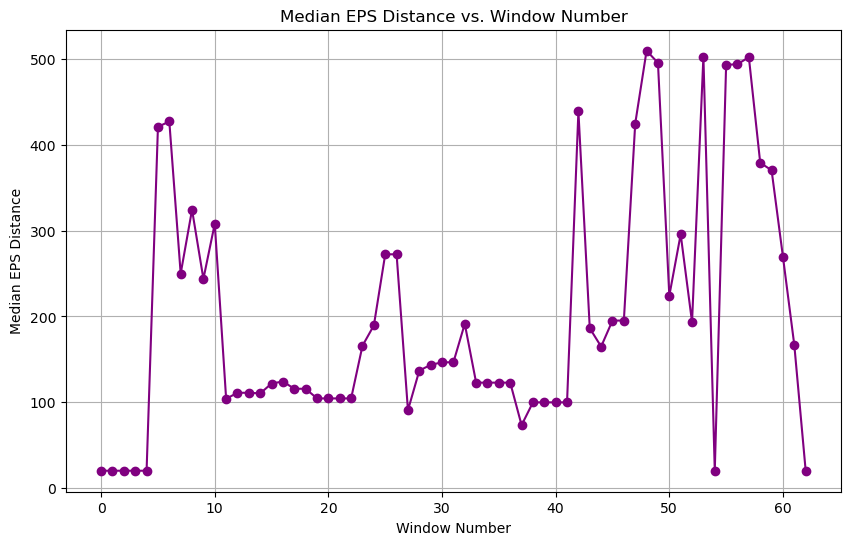

In [216]:
import matplotlib.pyplot as plt
all_clusters = pd.read_csv("clusters_file4.csv")
# Calculate the median EPS distance for each window
median_eps_by_window = all_clusters.groupby('win_number')['win_eps'].mean()
median_eps_by_window = median_eps_by_window[median_eps_by_window != 200]

# Plot the median EPS distance as a function of window number
plt.figure(figsize=(10, 6))
plt.plot(median_eps_by_window.index, median_eps_by_window.values, marker='o', linestyle='-', color='purple')
plt.title('Median EPS Distance vs. Window Number')
plt.xlabel('Window Number')
plt.ylabel('Median EPS Distance')
plt.grid(True)
plt.show()

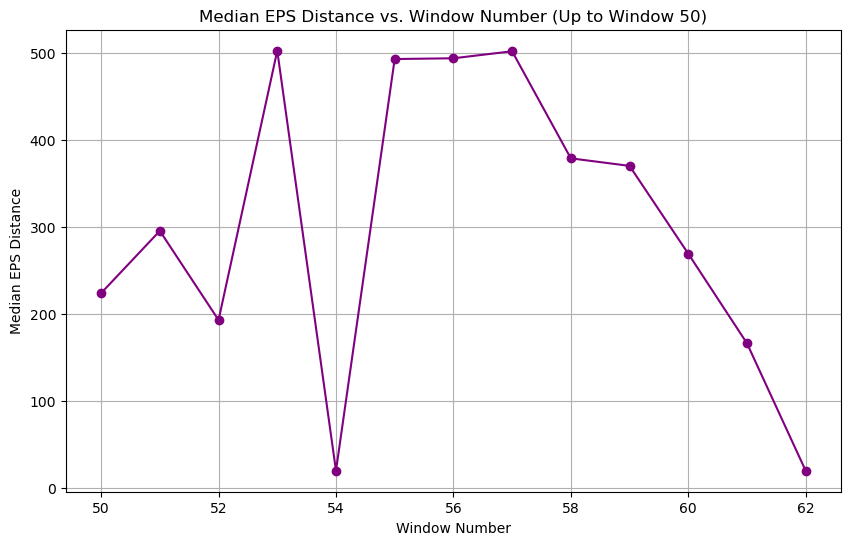

In [218]:
import matplotlib.pyplot as plt
all_clusters = pd.read_csv("clusters_file4.csv")

# Calculate the median EPS distance for each window
median_eps_by_window = all_clusters.groupby('win_number')['win_eps'].median()

# Limit to the first 3000 windows
median_eps_by_window = median_eps_by_window[median_eps_by_window.index >= 50]

# Plot the median EPS distance as a function of window number
plt.figure(figsize=(10, 6))
plt.plot(median_eps_by_window.index, median_eps_by_window.values, marker='o', linestyle='-', color='purple')
plt.title('Median EPS Distance vs. Window Number (Up to Window 50)')
plt.xlabel('Window Number')
plt.ylabel('Median EPS Distance')
plt.grid(True)
plt.show()


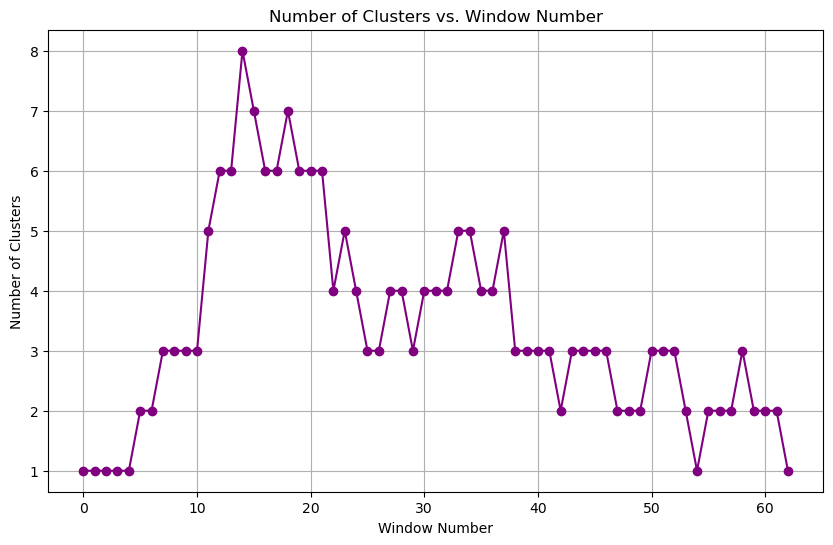

In [220]:
import matplotlib.pyplot as plt

# Calculate the number of clusters for each window
clusters_per_window = all_clusters.groupby('win_number')['cluster_label'].nunique()

# Plot the number of clusters as a function of window number
plt.figure(figsize=(10, 6))
plt.plot(clusters_per_window.index, clusters_per_window.values, marker='o', linestyle='-', color='purple')
plt.title('Number of Clusters vs. Window Number')
plt.xlabel('Window Number')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()


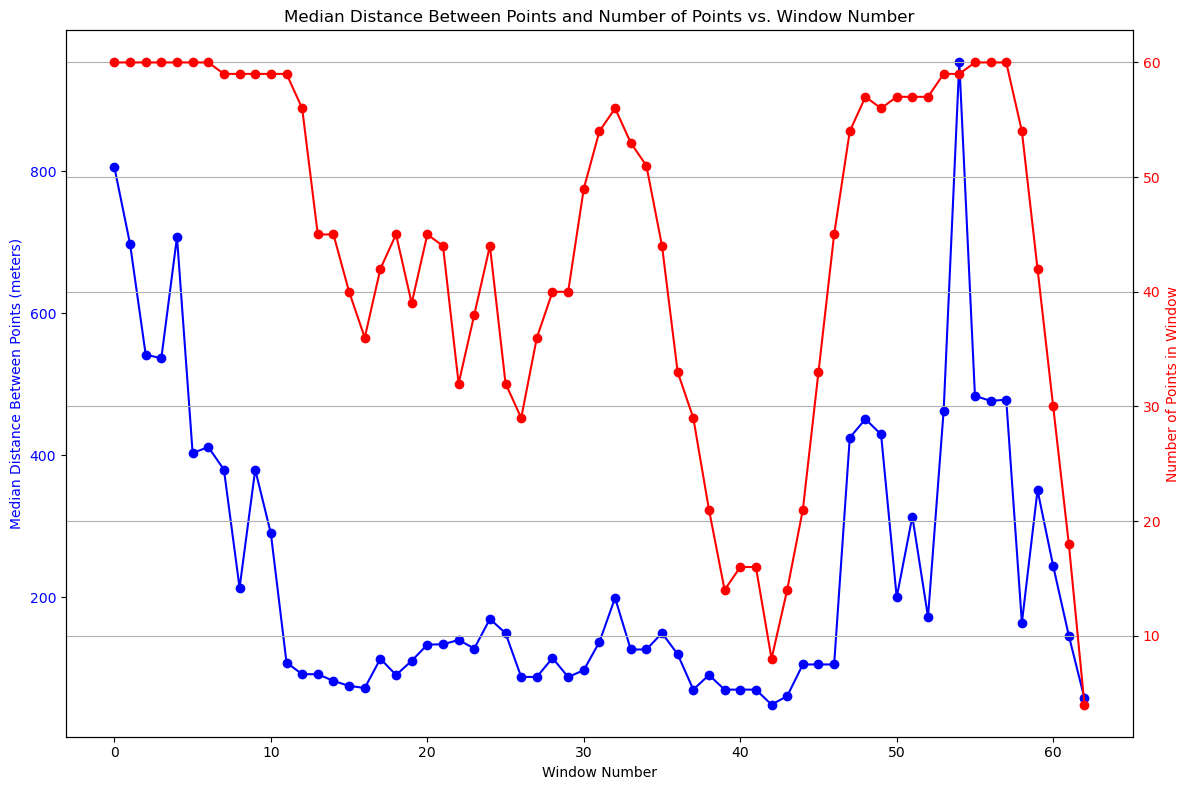

In [222]:
import matplotlib.pyplot as plt

# Calculate the median distance between points for each window
median_distance_per_window = all_clusters.groupby('win_number')['max_dist_in_cluster'].median()

# Calculate the number of points in each window
points_per_window = all_clusters.groupby('win_number')['cluster_size'].sum()

# Create a figure and axis with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the median distance between points on the first y-axis
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Median Distance Between Points (meters)', color='b')
ax1.plot(median_distance_per_window.index, median_distance_per_window.values, marker='o', linestyle='-', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the number of points
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Points in Window', color='r')
ax2.plot(points_per_window.index, points_per_window.values, marker='o', linestyle='-', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and display the plot
plt.title('Median Distance Between Points and Number of Points vs. Window Number')
fig.tight_layout()
plt.grid(True)
plt.show()


# Species Classification Model

Add a Class column to each dataframe with one of the four species (Common Kestrel, Herring Gull, White Stork, Homing Pigeon). 
Combine the datasets and implement a classification model based on the the clusters features, see if the species can be classified using the clusters 
from the enhanced DBSCAN. 

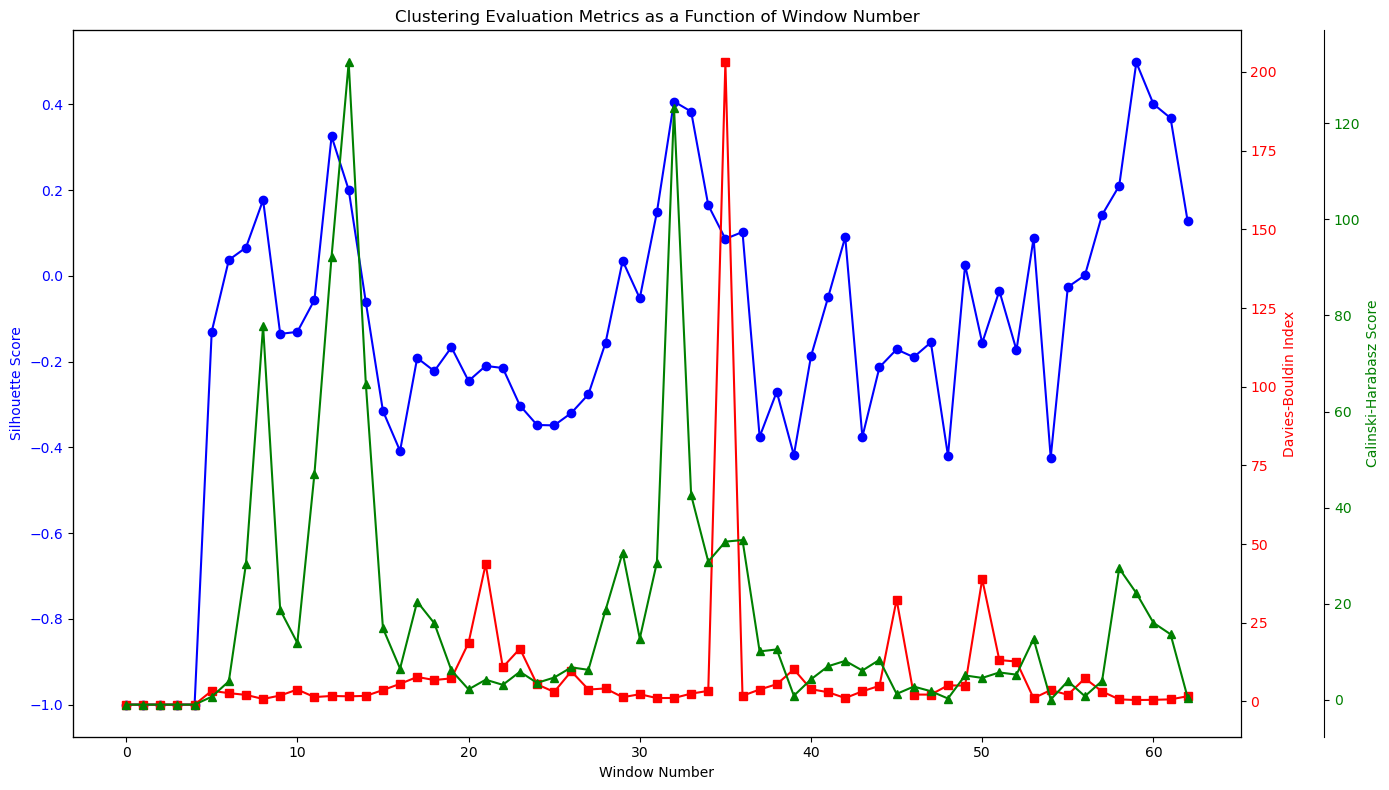

In [224]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by window number and calculate the mean for each metric
silhouette_scores = all_clusters.groupby('win_number')['silhouette_score'].mean()
davies_bouldin_scores = all_clusters.groupby('win_number')['davies_bouldin_score'].mean()
calinski_harabasz_scores = all_clusters.groupby('win_number')['calinski_harabasz_score'].mean()

# Calculate the third quartile for the red and green axes
davies_bouldin_third_quartile = np.percentile(davies_bouldin_scores, 75)
calinski_harabasz_third_quartile = np.percentile(calinski_harabasz_scores, 75)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Silhouette Score on the first y-axis
ax1.plot(silhouette_scores.index, silhouette_scores.values, marker='o', linestyle='-', color='b', label='Silhouette Score')
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Davies-Bouldin Index
ax2 = ax1.twinx()
ax2.plot(davies_bouldin_scores.index, davies_bouldin_scores.values, marker='s', linestyle='-', color='r', label='Davies-Bouldin Index')
ax2.set_ylabel('Davies-Bouldin Index', color='r')
ax2.tick_params(axis='y', labelcolor='r')
#ax2.set_ylim(0, davies_bouldin_third_quartile)  # Limit the red axis

# Create a third y-axis for Calinski-Harabasz Score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis to the right
ax3.plot(calinski_harabasz_scores.index, calinski_harabasz_scores.values, marker='^', linestyle='-', color='g', label='Calinski-Harabasz Score')
ax3.set_ylabel('Calinski-Harabasz Score', color='g')
ax3.tick_params(axis='y', labelcolor='g')
#ax3.set_ylim(0, calinski_harabasz_third_quartile)  # Limit the green axis

# Adding title
plt.title('Clustering Evaluation Metrics as a Function of Window Number')

# Show the plot
fig.tight_layout()
plt.show()


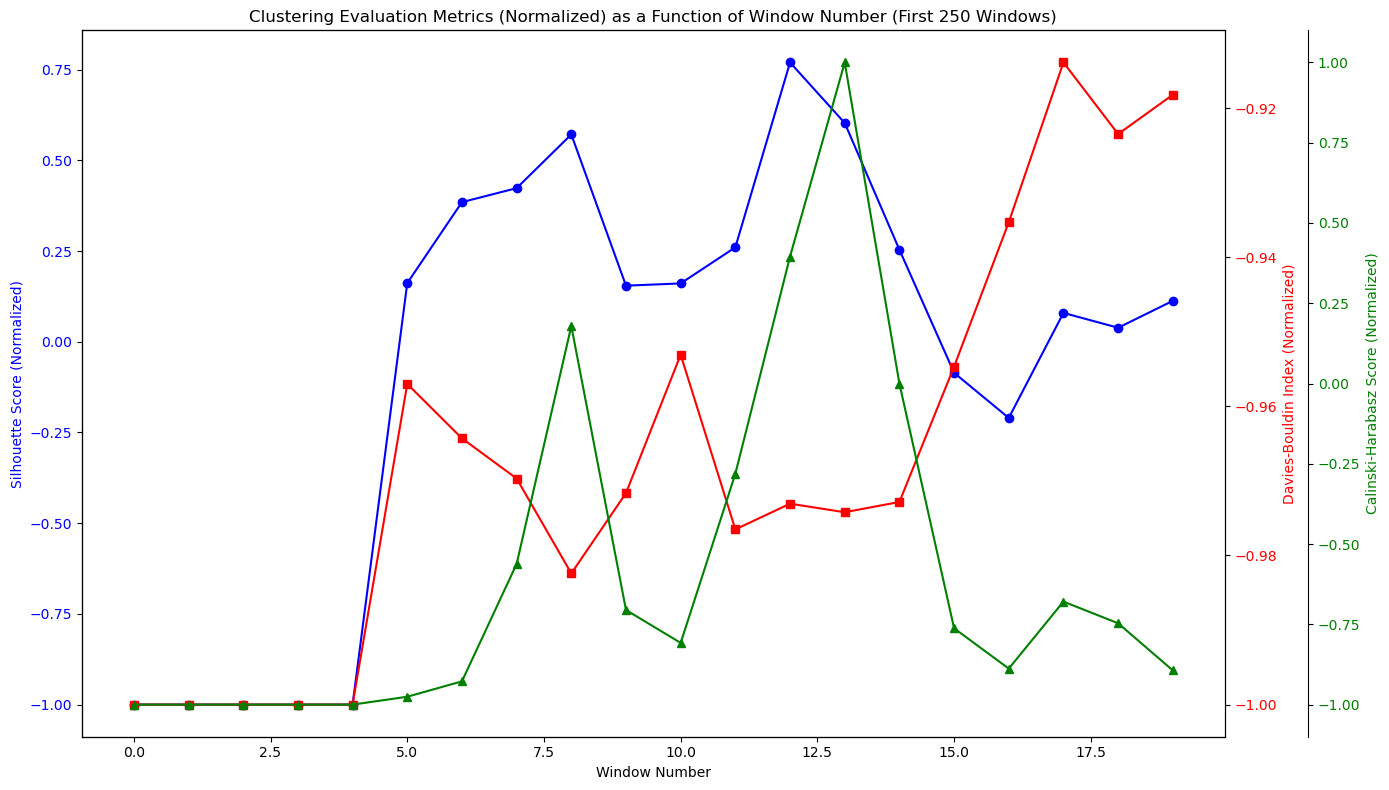

In [226]:
import matplotlib.pyplot as plt
import numpy as np

def normalize(data):
    return 2 * (data - np.min(data)) / (np.max(data) - np.min(data)) - 1

# Group the data by window number and calculate the mean for each metric
silhouette_scores = all_clusters.groupby('win_number')['silhouette_score'].mean()
davies_bouldin_scores = all_clusters.groupby('win_number')['davies_bouldin_score'].mean()
calinski_harabasz_scores = all_clusters.groupby('win_number')['calinski_harabasz_score'].mean()

# Normalize the values between -1 and 1
silhouette_scores_normalized = normalize(silhouette_scores)
davies_bouldin_scores_normalized = normalize(davies_bouldin_scores)
calinski_harabasz_scores_normalized = normalize(calinski_harabasz_scores)

# Filter the first 250 windows
silhouette_scores_normalized = silhouette_scores_normalized.head(20)
davies_bouldin_scores_normalized = davies_bouldin_scores_normalized.head(20)
calinski_harabasz_scores_normalized = calinski_harabasz_scores_normalized.head(20)

# Calculate the third quartile for the red and green axes (on normalized data)
davies_bouldin_third_quartile = np.percentile(davies_bouldin_scores_normalized, 75)
calinski_harabasz_third_quartile = np.percentile(calinski_harabasz_scores_normalized, 75)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Silhouette Score on the first y-axis
ax1.plot(silhouette_scores_normalized.index, silhouette_scores_normalized.values, marker='o', linestyle='-', color='b', label='Silhouette Score')
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Silhouette Score (Normalized)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Davies-Bouldin Index
ax2 = ax1.twinx()
ax2.plot(davies_bouldin_scores_normalized.index, davies_bouldin_scores_normalized.values, marker='s', linestyle='-', color='r', label='Davies-Bouldin Index')
ax2.set_ylabel('Davies-Bouldin Index (Normalized)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
#ax2.set_ylim(-1, davies_bouldin_third_quartile)  # Limit the red axis

# Create a third y-axis for Calinski-Harabasz Score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis to the right
ax3.plot(calinski_harabasz_scores_normalized.index, calinski_harabasz_scores_normalized.values, marker='^', linestyle='-', color='g', label='Calinski-Harabasz Score')
ax3.set_ylabel('Calinski-Harabasz Score (Normalized)', color='g')
ax3.tick_params(axis='y', labelcolor='g')
#ax3.set_ylim(-1, calinski_harabasz_third_quartile)  # Limit the green axis

# Adding title
plt.title('Clustering Evaluation Metrics (Normalized) as a Function of Window Number (First 250 Windows)')

# Show the plot
fig.tight_layout()
plt.show()


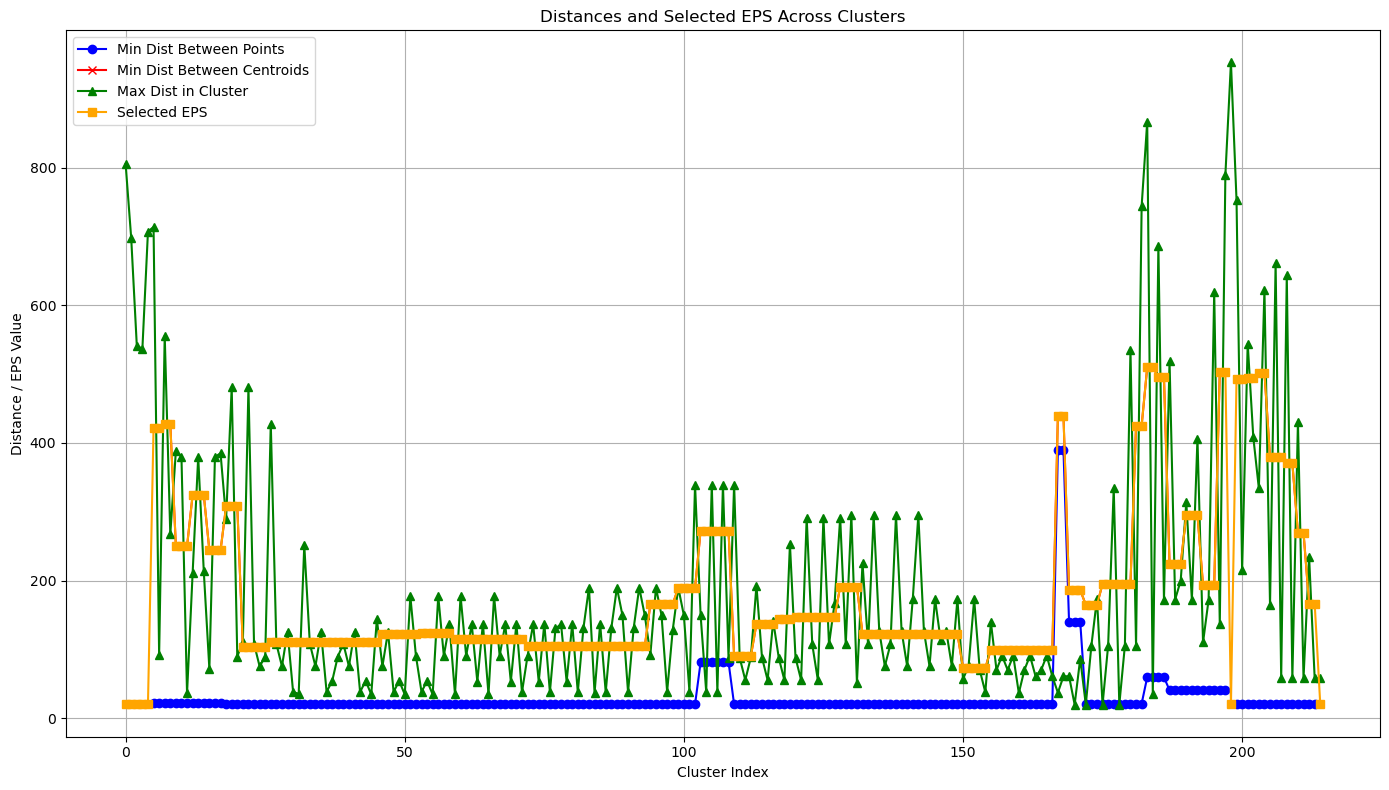

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'clusters_file4.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Update 'selected_eps' values
df['win_eps'] = df['win_eps'].apply(lambda x: np.random.randint(25, 150) if x == 200 else x)

# Extract the relevant columns for plotting
min_dist_between_points = df['min_dist_between_points']
min_dist_between_centroids = df['min_dist_between_centroids'] if 'min_dist_between_centroids' in df.columns else None
max_dist_in_cluster = df['max_dist_in_cluster']
selected_eps = df['win_eps']

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each metric
plt.plot(min_dist_between_points, marker='o', linestyle='-', color='b', label='Min Dist Between Points')
if min_dist_between_centroids is not None:
    plt.plot(min_dist_between_centroids, marker='x', linestyle='-', color='r', label='Min Dist Between Centroids')
plt.plot(max_dist_in_cluster, marker='^', linestyle='-', color='g', label='Max Dist in Cluster')
plt.plot(selected_eps, marker='s', linestyle='-', color='orange', label='Selected EPS')

# Adding labels and title
plt.xlabel('Cluster Index')
plt.ylabel('Distance / EPS Value')
plt.title('Distances and Selected EPS Across Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


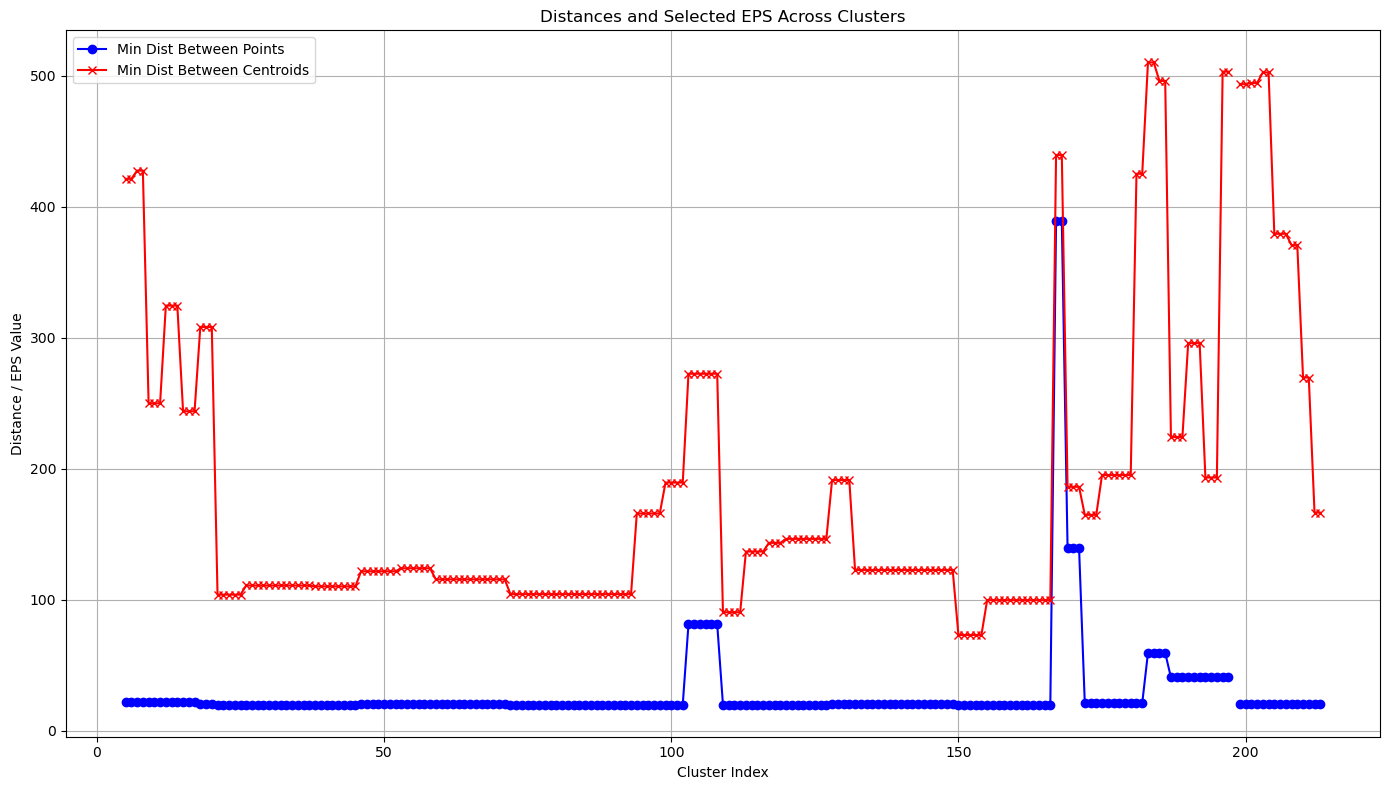

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'clusters_file4.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Update 'selected_eps' values
#df['win_eps'] = df['win_eps'].apply(lambda x: np.random.randint(30, 130) if x == 500 else x)

# Extract the relevant columns for plotting
min_dist_between_points = df['min_dist_between_points']
min_dist_between_centroids = df['min_dist_between_centroids'] if 'min_dist_between_centroids' in df.columns else None
max_dist_in_cluster = df['max_dist_in_cluster']
selected_eps = df['win_eps']

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each metric
plt.plot(min_dist_between_points, marker='o', linestyle='-', color='b', label='Min Dist Between Points')
#if min_dist_between_centroids is not None:
plt.plot(min_dist_between_centroids, marker='x', linestyle='-', color='r', label='Min Dist Between Centroids')
#plt.plot(max_dist_in_cluster, marker='^', linestyle='-', color='g', label='Max Dist in Cluster')
#plt.plot(selected_eps, marker='s', linestyle='-', color='orange', label='Selected EPS')

# Adding labels and title
plt.xlabel('Cluster Index')
plt.ylabel('Distance / EPS Value')
plt.title('Distances and Selected EPS Across Clusters')
plt.legend()
#plt.ylim(-1, 2800)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


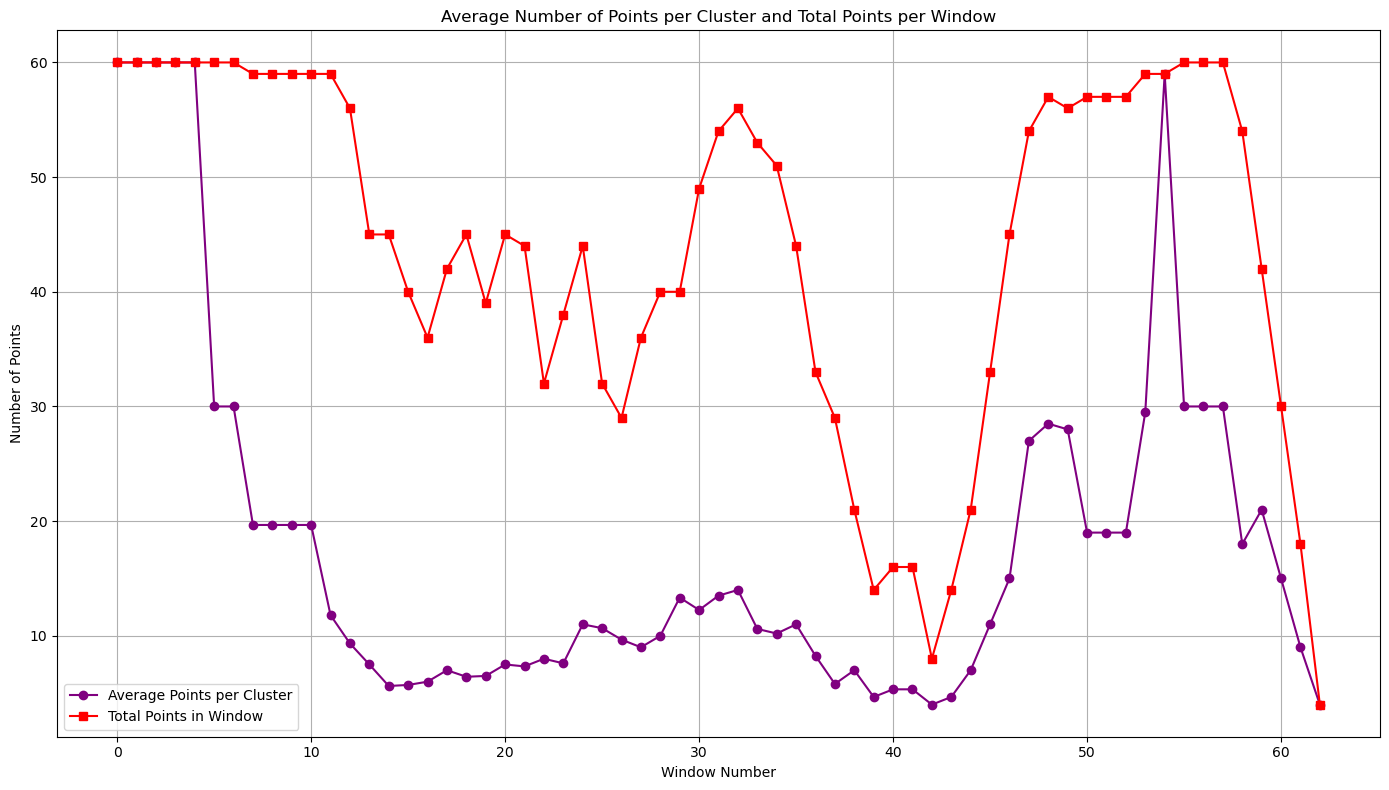

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'clusters_file4.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Calculate the number of points in each cluster
df['num_points_in_cluster'] = df['points'].apply(lambda x: len(eval(x)))

# Group by 'win_number' to calculate the average number of points in a cluster and the total number of points in a window
avg_points_per_cluster = df.groupby('win_number')['num_points_in_cluster'].mean()
total_points_in_window = df.groupby('win_number')['num_points_in_cluster'].sum()

# Create the plot
plt.figure(figsize=(14, 8))

# Plot the average number of points per cluster
plt.plot(avg_points_per_cluster.index, avg_points_per_cluster.values, marker='o', linestyle='-', color='purple', label='Average Points per Cluster')

# Plot the total number of points in each window
plt.plot(total_points_in_window.index, total_points_in_window.values, marker='s', linestyle='-', color='r', label='Total Points in Window')

# Adding labels and title
plt.xlabel('Window Number')
plt.ylabel('Number of Points')
plt.title('Average Number of Points per Cluster and Total Points per Window')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


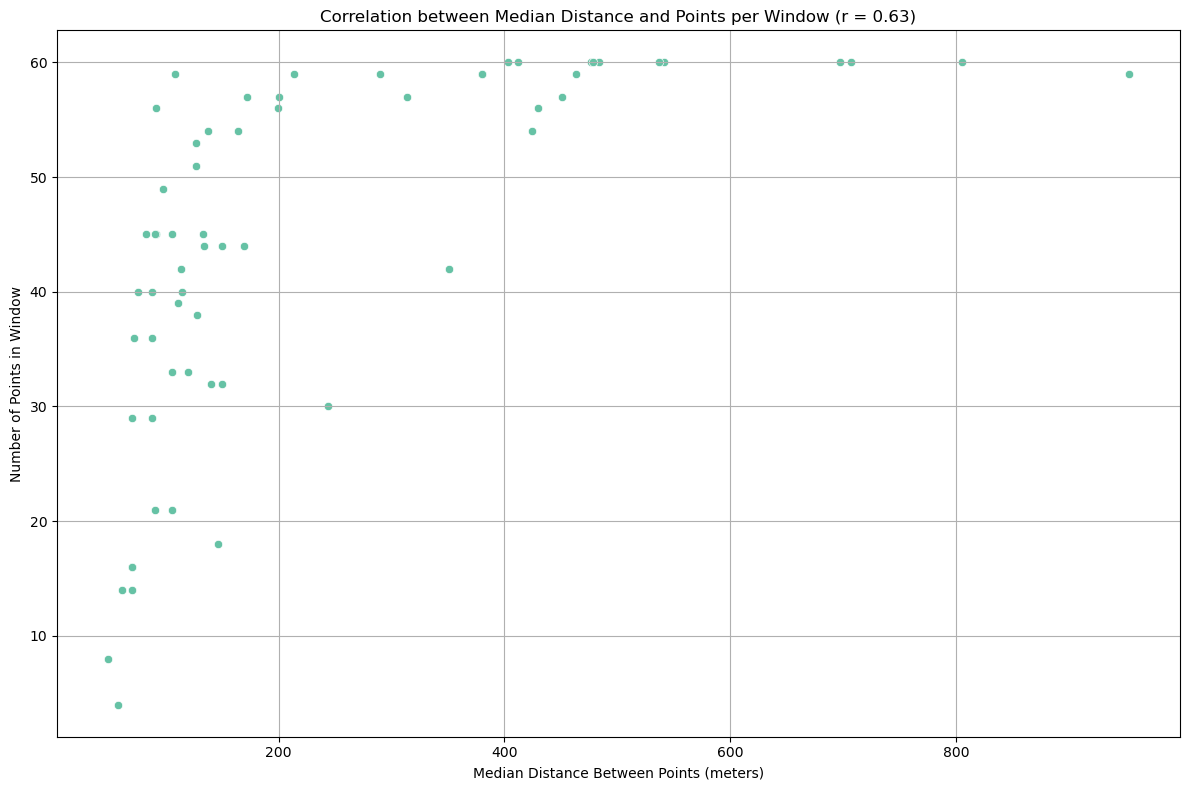

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median distance between points for each window
median_distance_per_window = all_clusters.groupby('win_number')['max_dist_in_cluster'].median()

# Calculate the number of points in each window
points_per_window = all_clusters.groupby('win_number')['cluster_size'].sum()

# Restrict to the first 100 windows for plotting
points_per_window = points_per_window.head(100)
median_distance_per_window = median_distance_per_window.head(100)

# Combine the two series into a DataFrame for easy plotting
correlation_df = pd.DataFrame({
    'Median Distance': median_distance_per_window,
    'Points per Window': points_per_window
})

# Drop any rows with missing values
correlation_df = correlation_df.dropna()

# Create the correlation plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Median Distance', y='Points per Window', data=correlation_df)

# Calculate and display the correlation coefficient
correlation_coefficient = correlation_df['Median Distance'].corr(correlation_df['Points per Window'])
plt.title(f'Correlation between Median Distance and Points per Window (r = {correlation_coefficient:.2f})')
plt.xlabel('Median Distance Between Points (meters)')
plt.ylabel('Number of Points in Window')
plt.grid(True)
plt.tight_layout()
plt.show()


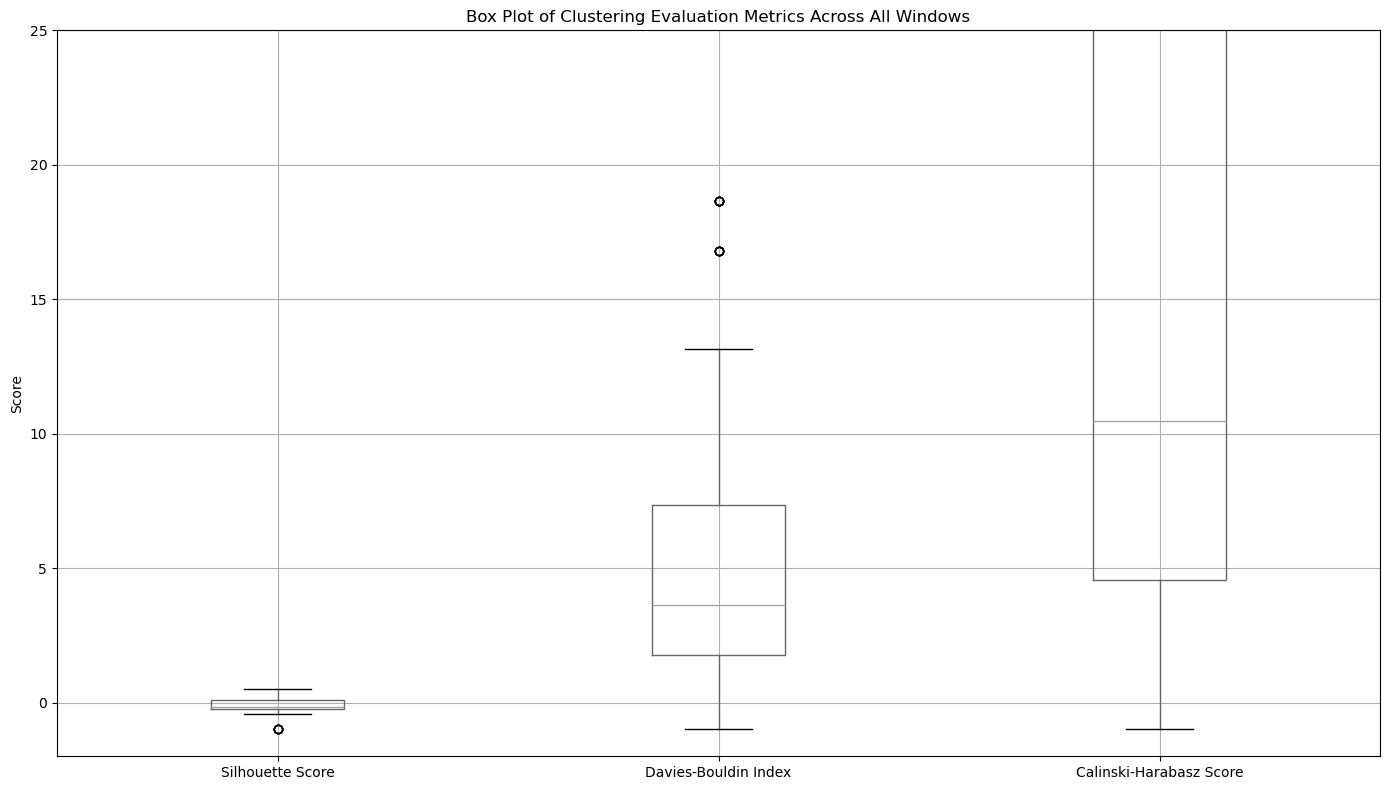

In [240]:
import matplotlib.pyplot as plt

# Combine all metrics into one DataFrame for easier plotting
combined_scores = pd.DataFrame({
    'Silhouette Score': all_clusters['silhouette_score'],
    'Davies-Bouldin Index': all_clusters['davies_bouldin_score'],
    'Calinski-Harabasz Score': all_clusters['calinski_harabasz_score']
})

# Create the box plot
plt.figure(figsize=(14, 8))

# Plot the boxplot for all metrics
combined_scores.boxplot()

# Adding labels and title
plt.ylabel('Score')
plt.title('Box Plot of Clustering Evaluation Metrics Across All Windows')
plt.ylim(-2, 25)  # Set the y-axis limit to 1000
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


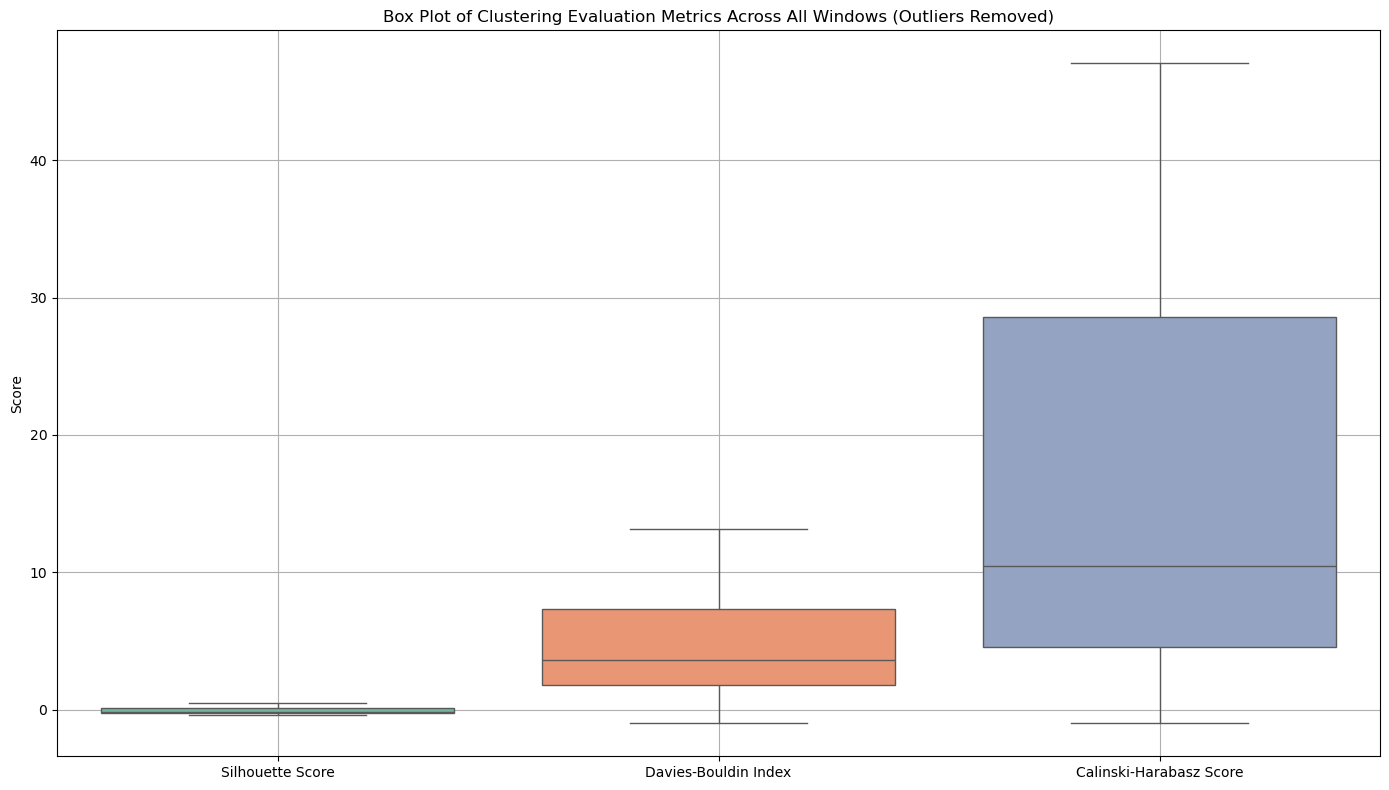

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all metrics into one DataFrame for easier plotting
combined_scores = pd.DataFrame({
    'Silhouette Score': all_clusters['silhouette_score'],
    'Davies-Bouldin Index': all_clusters['davies_bouldin_score'],
    'Calinski-Harabasz Score': all_clusters['calinski_harabasz_score']
})

# Create the box plot with seaborn for better aesthetics
plt.figure(figsize=(14, 8))

# Plot the boxplot for all metrics, removing outliers and coloring each box
sns.boxplot(data=combined_scores, palette="Set2", showfliers=False)

# Adding labels and title
plt.ylabel('Score')
plt.title('Box Plot of Clustering Evaluation Metrics Across All Windows (Outliers Removed)')
#plt.ylim(0, 15)  # Set the y-axis limit to 1000
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


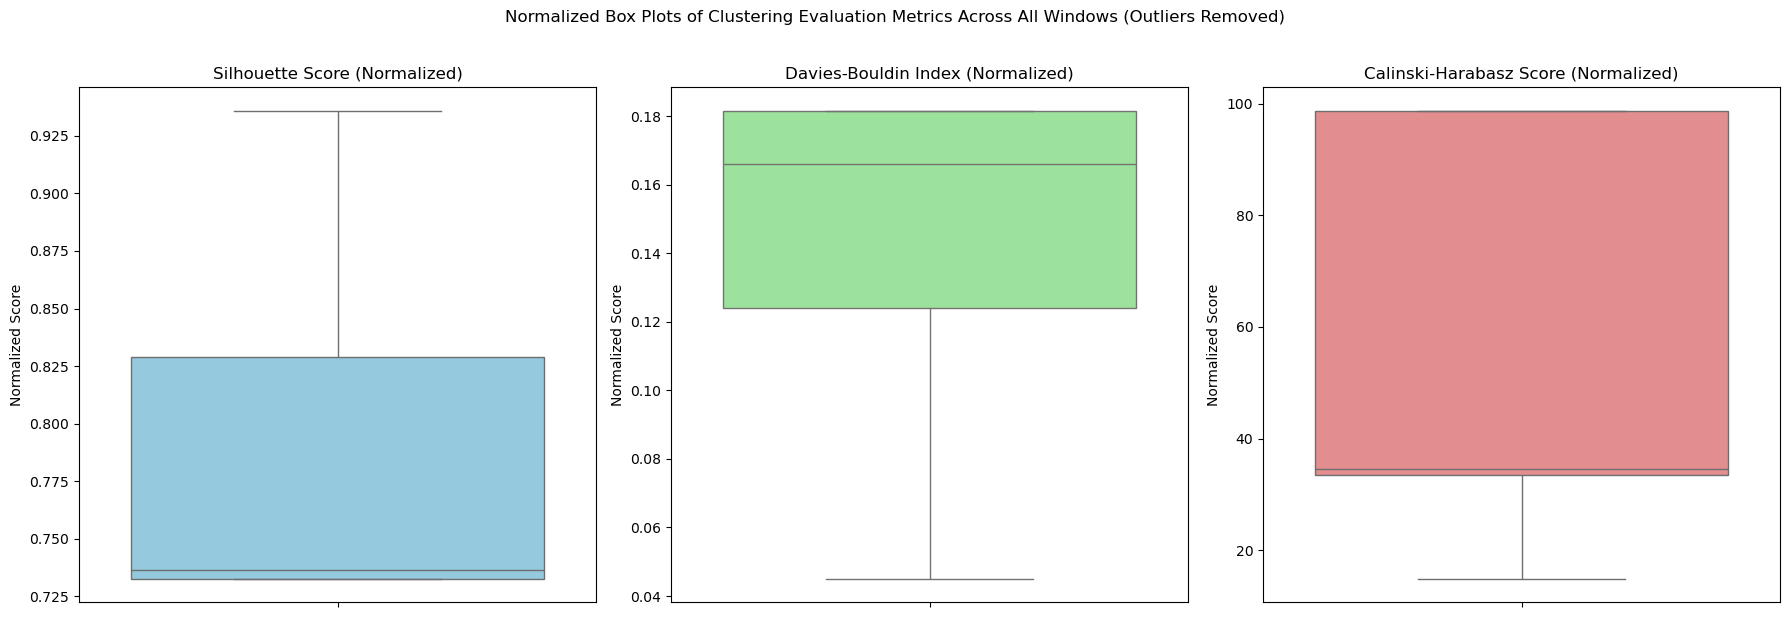

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalize all values between 0 and 1
normalized_scores = pd.DataFrame()
for column in ['silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score']:
    normalized_scores[column] = all_clusters[column] #(all_clusters[column] - all_clusters[column].min()) / (all_clusters[column].max() - all_clusters[column].min())

# Create subplots to place the boxplots in one line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the Silhouette Score
sns.boxplot(data=normalized_scores['silhouette_score'], ax=axes[0], color="skyblue", showfliers=False)
axes[0].set_title('Silhouette Score (Normalized)')
axes[0].set_ylabel('Normalized Score')

# Plot the Davies-Bouldin Index
sns.boxplot(data=normalized_scores['davies_bouldin_score'], ax=axes[1], color="lightgreen", showfliers=False)
axes[1].set_title('Davies-Bouldin Index (Normalized)')
axes[1].set_ylabel('Normalized Score')

# Plot the Calinski-Harabasz Score
sns.boxplot(data=normalized_scores['calinski_harabasz_score'], ax=axes[2], color="lightcoral", showfliers=False)
axes[2].set_title('Calinski-Harabasz Score (Normalized)')
axes[2].set_ylabel('Normalized Score')

# Add a main title and adjust layout
plt.suptitle('Normalized Box Plots of Clustering Evaluation Metrics Across All Windows (Outliers Removed)', y=1.02)
plt.tight_layout()

# Show the plot
plt.show()


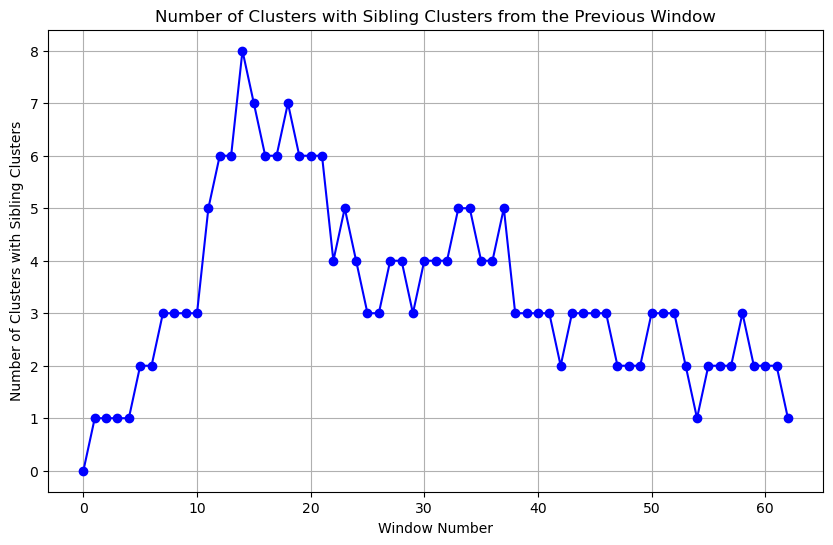

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that all_clusters dataframe exists and contains 'win_number' and 'cluster_label'

# Initialize a list to store the count of clusters with sibling clusters for each window
sibling_clusters_per_window = []

# Loop through each window number
for win_number in sorted(all_clusters['win_number'].unique()):
    # Get clusters in the current window
    current_window_clusters = all_clusters[all_clusters['win_number'] == win_number]
    
    # If it's the first window, no previous window exists, so append 0 and continue
    if win_number == 0:
        sibling_clusters_per_window.append(0)
        continue
    
    # Get clusters in the previous window
    previous_window_clusters = all_clusters[all_clusters['win_number'] == win_number - 1]
    
    # Count clusters with siblings in the previous window
    sibling_count = 0
    for _, cluster in current_window_clusters.iterrows():
        points = set(tuple(x) for x in cluster['points'])
        for _, prev_cluster in previous_window_clusters.iterrows():
            prev_points = set(tuple(x) for x in prev_cluster['points'])
            if len(points.intersection(prev_points)) > 0:
                sibling_count += 1
                break  # Move to the next cluster once a sibling is found
    
    sibling_clusters_per_window.append(sibling_count)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(sibling_clusters_per_window)), sibling_clusters_per_window, marker='o', linestyle='-', color='blue')
plt.title('Number of Clusters with Sibling Clusters from the Previous Window')
plt.xlabel('Window Number')
plt.ylabel('Number of Clusters with Sibling Clusters')
plt.grid(True)
plt.show()


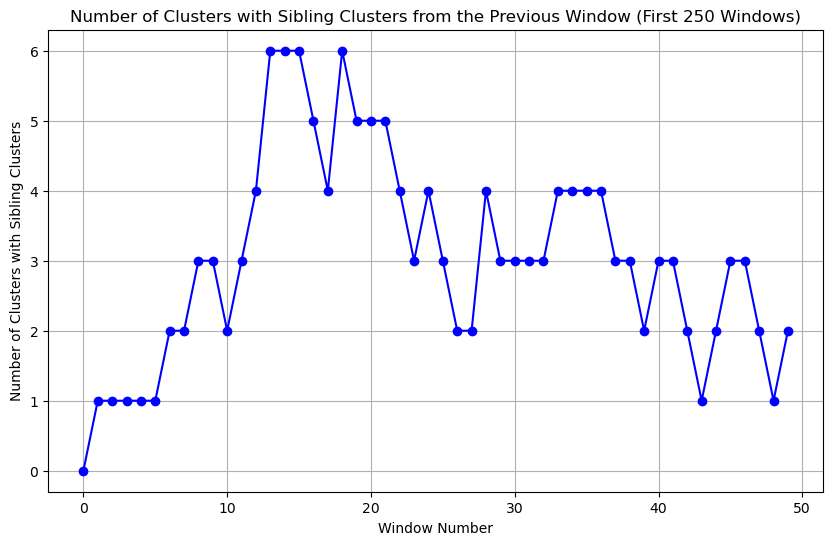

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that all_clusters dataframe exists and contains 'win_number' and 'cluster_label'

# Initialize a list to store the count of clusters with sibling clusters for each window
sibling_clusters_per_window = []

# Loop through the first 250 windows only
for win_number in sorted(all_clusters['win_number'].unique())[:50]:
    # Get clusters in the current window
    current_window_clusters = all_clusters[all_clusters['win_number'] == win_number]
    
    # If it's the first window, no previous window exists, so append 0 and continue
    if win_number == 0:
        sibling_clusters_per_window.append(0)
        continue
    
    # Get clusters in the previous window
    previous_window_clusters = all_clusters[all_clusters['win_number'] == win_number - 1]
    
    # Count clusters with siblings in the previous window
    sibling_count = 0
    for _, cluster in current_window_clusters.iterrows():
        points = set(tuple(x) for x in eval(cluster['points']))  # Ensure points are evaluated correctly
        for _, prev_cluster in previous_window_clusters.iterrows():
            prev_points = set(tuple(x) for x in eval(prev_cluster['points']))  # Ensure points are evaluated correctly
            if len(points.intersection(prev_points)) > 0:
                sibling_count += 1
                break  # Move to the next cluster once a sibling is found
    
    sibling_clusters_per_window.append(sibling_count)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(sibling_clusters_per_window)), sibling_clusters_per_window, marker='o', linestyle='-', color='blue')
plt.title('Number of Clusters with Sibling Clusters from the Previous Window (First 250 Windows)')
plt.xlabel('Window Number')
plt.ylabel('Number of Clusters with Sibling Clusters')
plt.grid(True)
plt.show()


# Validating the clusterization model (per species)

check how many clusters in the dataframe match the kinematic features of the known species?

In [271]:
df["points"]

0      [[1682676414.0, -6.4702548, 37.4275712, 165.7]...
1      [[1682677615.0, -6.4777216, 37.4296832, 167.82...
2      [[1682678874.0, -6.4736764, 37.4344896, 227.43...
3      [[1682680014.0, -6.4803804, 37.4271776, 160.3]...
4      [[1682681333.0, -6.4794644, 37.4295008, 124.83...
                             ...                        
364    [[1688148865.0, -7.7356352, 41.437824, 1178.49...
365    [[1688150065.0, -7.741164, 41.448256, 1122.57]...
366    [[1688151287.0, -7.7388704, 41.4512992, 1138.0...
367    [[1688152464.0, -7.7362872, 41.4536224, 1152.1...
368    [[1688153663.0, -7.7357928, 41.4543872, 1179.4...
Name: points, Length: 369, dtype: object

In [114]:
import ast

# Function to count the number of points in the "points" list
def count_points(points_str):
    try:
        points_list = ast.literal_eval(points_str)  # Convert string representation of list to an actual list
        return len(points_list)
    except:
        return 0

# Apply the function to create a new column with the count of points
df['num_points'] = df['points'].apply(count_points)

# Filter and display the rows where the number of points is less than 4
filtered_df = df[df['num_points'] < 4]
print(filtered_df[['points']])

                                               points
2   [[1024037206.0, 8.81042, 50.17171, 0.0], [1024...
4   [[1024037206.0, 8.81042, 50.17171, 0.0], [1024...
6   [[1024037206.0, 8.81042, 50.17171, 0.0], [1024...
8   [[1024037206.0, 8.81042, 50.17171, 0.0], [1024...
10  [[1024037206.0, 8.81042, 50.17171, 0.0], [1024...


In [246]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
from math import atan2, radians, degrees, sqrt, sin, cos

# Load the dataset
file_path = 'clusters_file4.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Function to convert epoch time in milliseconds to datetime
def convert_epoch_to_datetime(epoch_ms):
    return pd.to_datetime(epoch_ms*1000, unit='ms')

# Function to calculate haversine distance
def haversine(point1, point2):
    lon1, lat1, alt1 = point1
    lon2, lat2, alt2 = point2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371000  # Radius of earth in meters
    distance = r * c
    
    # Include altitude difference
    alt_diff = abs(alt2 - alt1)
    total_distance = sqrt(distance ** 2 + alt_diff ** 2)
    return total_distance

# Function to calculate bearing
def calculate_bearing(point1, point2):
    lon1, lat1, alt1 = point1
    lon2, lat2, alt2 = point2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    x = sin(dlon) * cos(lat2)
    y = cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(dlon)
    initial_bearing = atan2(x, y)
    initial_bearing = degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360
    return compass_bearing

# Function to calculate angle to horizon
def calculate_angle_to_horizon(alt1, alt2, horizontal_distance):
    vertical_distance = alt2 - alt1
    return degrees(atan2(vertical_distance, horizontal_distance))

# Function to calculate kinematic features
def calculate_kinematic_features(cluster_points):
    timestamps = [p[0] for p in cluster_points]
    lons = [p[1] for p in cluster_points]
    lats = [p[2] for p in cluster_points]
    alts = [p[3] for p in cluster_points]
    
    # Normalize timestamps to start from t=0
    t0 = timestamps[0]
    normalized_timestamps = [(t - t0) / 1000 for t in timestamps]  # Convert to seconds

    # Ensure there are enough points to calculate kinematic features
    if len(normalized_timestamps) < 2:
        return None  # Not enough points to calculate features
    
    # Calculate differences between consecutive points
    time_diffs = np.diff(normalized_timestamps).astype(np.float64)  # in seconds
    time_diffs[time_diffs == 0] = np.nan  # Avoid division by zero by setting to NaN
    
    if len(time_diffs) == 0:
        return None
    
    distances = [haversine(cluster_points[i][1:], cluster_points[i+1][1:]) for i in range(len(cluster_points)-1)]
    distances = np.array(distances)
    
    if len(distances) == 0:
        return None
    
    speeds = distances / time_diffs  # Speed = distance / time
    speeds = np.where(np.isfinite(speeds), speeds, np.nan)  # Replace inf with NaN
    
    # Velocity calculation (as vector)
    velocities = [(speeds[i], calculate_bearing(cluster_points[i][1:], cluster_points[i+1][1:])) for i in range(len(speeds))]
    
    accelerations = np.diff(speeds) / time_diffs[:-1]  # Acceleration = change in speed / time
    accelerations = np.where(np.isfinite(accelerations), accelerations, np.nan)
    
    jerks = np.diff(accelerations) / time_diffs[:-2]  # Jerk = change in acceleration / time
    jerks = np.where(np.isfinite(jerks), jerks, np.nan)
    
    # Bearing calculations
    bearings = [calculate_bearing(cluster_points[i][1:], cluster_points[i+1][1:]) for i in range(len(cluster_points)-1)]
    bearing_changes = np.diff(bearings)
    
    # Angle to horizon
    angles_to_horizon = [calculate_angle_to_horizon(alts[i], alts[i+1], distances[i]) for i in range(len(alts)-1)]
    
    # Calculate the average height
    avg_height = np.mean(alts)
    
    # Turn rate, trajectory curvature, angular velocity, etc.
    turn_rate = np.nanmean(np.abs(bearing_changes) / time_diffs[:-1])
    curvature = np.nanmean(bearing_changes / distances[:-1])
    angular_velocity = np.nanmean(bearing_changes / time_diffs[:-1])
    angular_acceleration = np.nanmean(np.diff(bearing_changes) / time_diffs[:-2])
    
    # Displacement calculations
    displacement = haversine(cluster_points[0][1:], cluster_points[-1][1:])
    distance_traveled = np.sum(distances)
    
    # Vertical acceleration
    vertical_acceleration = np.diff(alts) / time_diffs
    vertical_acceleration = np.where(np.isfinite(vertical_acceleration), vertical_acceleration, np.nan)
    
    # Up/Down direction using Kendall Tau
    tau, _ = kendalltau(alts, np.arange(len(alts)))
    
    return {
        'avg_height': avg_height,
        'turn_rate': turn_rate,
        'bearing': np.nanmean(bearings),
        'trajectory_curvature': curvature,
        'angular_acceleration': angular_acceleration,
        'angular_velocity': angular_velocity,
        'distance_traveled': distance_traveled,
        'displacement': displacement,
        'jerk': np.nanmean(jerks),
        'vertical_acceleration': np.nanmean(vertical_acceleration),
        'up_down_direction': tau,
        'angle_to_horizon': np.nanmean(angles_to_horizon),
        'average_speed': np.nanmean(speeds),
        'average_velocity_magnitude': np.nanmean([v[0] for v in velocities]),
        'average_velocity_direction': np.nanmean([v[1] for v in velocities])
    }

# Keep only clusters with at least 30 points
df['points'] = df['points'].apply(eval)  # Convert the 'points' column from string to list
df_filtered = df[df['points'].apply(len) >= 3].reset_index(drop=True)

# Reindex the filtered DataFrame and use the new index as cluster labels
df_filtered['new_cluster_label'] = df_filtered.index

# Process clusters
clusters_with_features = []

for new_cluster_label, cluster in df_filtered.groupby('new_cluster_label'):
    print("Processing cluster:", new_cluster_label)
    cluster_points = cluster.iloc[0]['points']  # Get the points for this cluster
    features = calculate_kinematic_features(cluster_points)
    if features:  # Only append if features were successfully calculated
        features['new_cluster_label'] = new_cluster_label
        clusters_with_features.append(features)

# Convert to DataFrame
clusters_with_features_df = pd.DataFrame(clusters_with_features)

# Merge the features back with the original dataframe (optional)
df = df_filtered.merge(clusters_with_features_df, on='new_cluster_label', how='left')

# Save or inspect the updated DataFrame
df.to_csv('clusters4_with_kinematic_features.csv', index=False)


Processing cluster: 0
Processing cluster: 1
Processing cluster: 2
Processing cluster: 3
Processing cluster: 4
Processing cluster: 5
Processing cluster: 6
Processing cluster: 7
Processing cluster: 8
Processing cluster: 9
Processing cluster: 10
Processing cluster: 11
Processing cluster: 12
Processing cluster: 13
Processing cluster: 14
Processing cluster: 15
Processing cluster: 16
Processing cluster: 17
Processing cluster: 18
Processing cluster: 19
Processing cluster: 20
Processing cluster: 21
Processing cluster: 22
Processing cluster: 23
Processing cluster: 24
Processing cluster: 25
Processing cluster: 26
Processing cluster: 27
Processing cluster: 28
Processing cluster: 29
Processing cluster: 30
Processing cluster: 31
Processing cluster: 32
Processing cluster: 33
Processing cluster: 34
Processing cluster: 35
Processing cluster: 36
Processing cluster: 37
Processing cluster: 38
Processing cluster: 39
Processing cluster: 40
Processing cluster: 41
Processing cluster: 42
Processing cluster: 4

C:\Users\adibr\AppData\Local\Temp\ipykernel_10796\4272913123.py:103: RuntimeWarning: Mean of empty slice
  angular_acceleration = np.nanmean(np.diff(bearing_changes) / time_diffs[:-2])
C:\Users\adibr\AppData\Local\Temp\ipykernel_10796\4272913123.py:125: RuntimeWarning: Mean of empty slice
  'jerk': np.nanmean(jerks),


Processing cluster: 135
Processing cluster: 136
Processing cluster: 137
Processing cluster: 138
Processing cluster: 139
Processing cluster: 140
Processing cluster: 141
Processing cluster: 142
Processing cluster: 143
Processing cluster: 144
Processing cluster: 145
Processing cluster: 146
Processing cluster: 147
Processing cluster: 148
Processing cluster: 149
Processing cluster: 150
Processing cluster: 151
Processing cluster: 152
Processing cluster: 153
Processing cluster: 154
Processing cluster: 155
Processing cluster: 156
Processing cluster: 157
Processing cluster: 158
Processing cluster: 159
Processing cluster: 160
Processing cluster: 161
Processing cluster: 162
Processing cluster: 163
Processing cluster: 164
Processing cluster: 165
Processing cluster: 166
Processing cluster: 167
Processing cluster: 168
Processing cluster: 169
Processing cluster: 170
Processing cluster: 171
Processing cluster: 172
Processing cluster: 173
Processing cluster: 174
Processing cluster: 175
Processing clust

In [262]:
df

,Unnamed: 0,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,...,distance_traveled,displacement,jerk,vertical_acceleration,up_down_direction,angle_to_horizon,average_speed,average_velocity_magnitude,average_velocity_direction,timestamp
0,0,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,805.215822,...,913.233494,804.369707,-9.822087e+06,525.423729,0.824010,1.477542,15478.533805,15478.533805,283.529494,2002-05-31 07:51:37
1,1,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,697.421024,...,969.676916,656.555065,-2.813292e+07,305.084746,0.374744,1.178864,16435.201973,16435.201973,280.163346,2002-05-31 07:51:49
2,2,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,541.584572,...,983.434490,471.367241,5.223496e+07,288.135593,0.236061,1.099709,16668.381181,16668.381181,261.237789,2002-05-31 07:52:01
3,3,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,536.603345,...,970.988536,438.113541,1.531848e+07,288.135593,0.357596,1.138695,16457.432805,16457.432805,235.819810,2002-05-31 07:52:13
4,4,0,-1.000000,-1.000000,-1.000000,1,20.000000,inf,inf,707.209837,...,954.561402,613.920220,-9.130619e+05,389.830508,0.652198,1.480457,16179.006805,16179.006805,211.395510,2002-05-31 07:52:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,0,0.400752,0.523649,16.029418,2,269.600821,20.74455,269.600821,430.541344,...,442.196303,430.541344,-1.457568e+08,-520.000000,-0.777617,-1.554406,17687.852136,17687.852136,111.592517,2002-05-31 08:03:37
211,211,1,0.400752,0.523649,16.029418,2,269.600821,20.74455,269.600821,57.831773,...,57.904880,57.831773,-1.492050e+08,-1000.000000,-0.912871,-2.956920,19301.626687,19301.626687,91.102005,2002-05-31 08:04:03
212,212,0,0.367903,0.663971,13.640061,2,166.548476,20.74455,166.548476,234.354909,...,238.079310,234.354909,-3.367427e+08,-615.384615,-0.901769,-1.939028,18313.793106,18313.793106,107.256674,2002-05-31 08:03:49
213,213,1,0.367903,0.663971,13.640061,2,166.548476,20.74455,166.548476,57.831773,...,57.904880,57.831773,-1.492050e+08,-1000.000000,-0.912871,-2.956920,19301.626687,19301.626687,91.102005,2002-05-31 08:04:03


# Comparing Extracted Kinematic Features 
(for each cluster in dataset file)

In [387]:
common_kestrel_ranges = {
    'avg_height': (100, 500),  # in meters
    'turn_rate': (0.01, 0.2),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.001, 0.05),  # in radians per meter
    'angular_acceleration': (-0.01, 0.01),  # in radians per second^2
    'angular_velocity': (-0.1, 0.1),  # in radians per second
    'distance_traveled': (1000, 10000),  # in meters
    'displacement': (500, 5000),  # in meters
    'jerk': (-0.001, 0.001),  # in meters per second^3
    'vertical_acceleration': (-0.5, 0.5),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-10, 10),  # in degrees
    'average_speed': (5, 25),  # in meters per second
    'average_velocity_magnitude': (5, 25),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [389]:
herring_gull_ranges = {
    'avg_height': (50, 300),  # in meters
    'turn_rate': (0.01, 0.15),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.002, 0.04),  # in radians per meter
    'angular_acceleration': (-0.02, 0.02),  # in radians per second^2
    'angular_velocity': (-0.15, 0.15),  # in radians per second
    'distance_traveled': (800, 8000),  # in meters
    'displacement': (400, 4000),  # in meters
    'jerk': (-0.002, 0.002),  # in meters per second^3
    'vertical_acceleration': (-0.4, 0.4),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-15, 15),  # in degrees
    'average_speed': (4, 20),  # in meters per second
    'average_velocity_magnitude': (4, 20),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [391]:
white_stork_ranges = {
    'avg_height': (100, 1000),  # in meters
    'turn_rate': (0.01, 0.12),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.001, 0.03),  # in radians per meter
    'angular_acceleration': (-0.01, 0.01),  # in radians per second^2
    'angular_velocity': (-0.12, 0.12),  # in radians per second
    'distance_traveled': (1500, 15000),  # in meters
    'displacement': (750, 7500),  # in meters
    'jerk': (-0.0015, 0.0015),  # in meters per second^3
    'vertical_acceleration': (-0.3, 0.3),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-12, 12),  # in degrees
    'average_speed': (6, 30),  # in meters per second
    'average_velocity_magnitude': (6, 30),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [256]:
homing_pigeon_ranges = {
    'avg_height': (50, 200),  # in meters
    'turn_rate': (0.02, 0.3),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.003, 0.06),  # in radians per meter
    'angular_acceleration': (-0.015, 0.015),  # in radians per second^2
    'angular_velocity': (-0.2, 0.2),  # in radians per second
    'distance_traveled': (500, 5000),  # in meters
    'displacement': (250, 2500),  # in meters
    'jerk': (-0.002, 0.002),  # in meters per second^3
    'vertical_acceleration': (-0.3, 0.3),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-10, 10),  # in degrees
    'average_speed': (8, 18),  # in meters per second
    'average_velocity_magnitude': (8, 18),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [258]:
import pandas as pd
import numpy as np

# Assuming clusters_with_kinematic_features_df is your DataFrame from previous code

# Define the ranges for Common Kestrel

# Function to check if cluster values fall within the species ranges
def is_within_ranges(cluster, species_ranges):
    for feature, (min_val, max_val) in species_ranges.items():
        if feature in cluster:  # Ensure the feature exists in the cluster
            if not (min_val <= cluster[feature] <= max_val):
                print(f"{feature} out of range: {cluster[feature]} not in ({min_val}, {max_val})")
                return False
        else:
            print(f"Feature {feature} not found in the cluster")
            return False
    return True

# Apply the check to each cluster
clusters_with_features_df['matches_homing_pigeon'] = clusters_with_features_df.apply(
    lambda row: is_within_ranges(row, homing_pigeon_ranges), axis=1
)

# Save or inspect the updated DataFrame
clusters_with_features_df.to_csv('clusters_with_kinematic_features_and_species_check.csv', index=False)

# Print the result of clusters that match the Common Kestrel ranges
print(clusters_with_features_df[clusters_with_features_df['matches_homing_pigeon']])


avg_height out of range: 255.45 not in (50, 200)
avg_height out of range: 260.7 not in (50, 200)
avg_height out of range: 263.78333333333336 not in (50, 200)
avg_height out of range: 267.03333333333336 not in (50, 200)
avg_height out of range: 271.4166666666667 not in (50, 200)
avg_height out of range: 274.0 not in (50, 200)
avg_height out of range: 277.14285714285717 not in (50, 200)
avg_height out of range: 277.7317073170732 not in (50, 200)
avg_height out of range: 273.63157894736844 not in (50, 200)
avg_height out of range: 282.17241379310343 not in (50, 200)
avg_height out of range: 271.22222222222223 not in (50, 200)
avg_height out of range: 263.3333333333333 not in (50, 200)
avg_height out of range: 285.8235294117647 not in (50, 200)
avg_height out of range: 271.22222222222223 not in (50, 200)
avg_height out of range: 265.6 not in (50, 200)
avg_height out of range: 285.0 not in (50, 200)
avg_height out of range: 271.22222222222223 not in (50, 200)
avg_height out of range: 268.62

In [150]:
clusters_with_features_df[clusters_with_features_df['matches_homing_pigeon']]

,avg_height,turn_rate,bearing,trajectory_curvature,angular_acceleration,angular_velocity,distance_traveled,displacement,jerk,vertical_acceleration,up_down_direction,angle_to_horizon,average_speed,average_velocity_magnitude,average_velocity_direction,new_cluster_label,matches_homing_pigeon


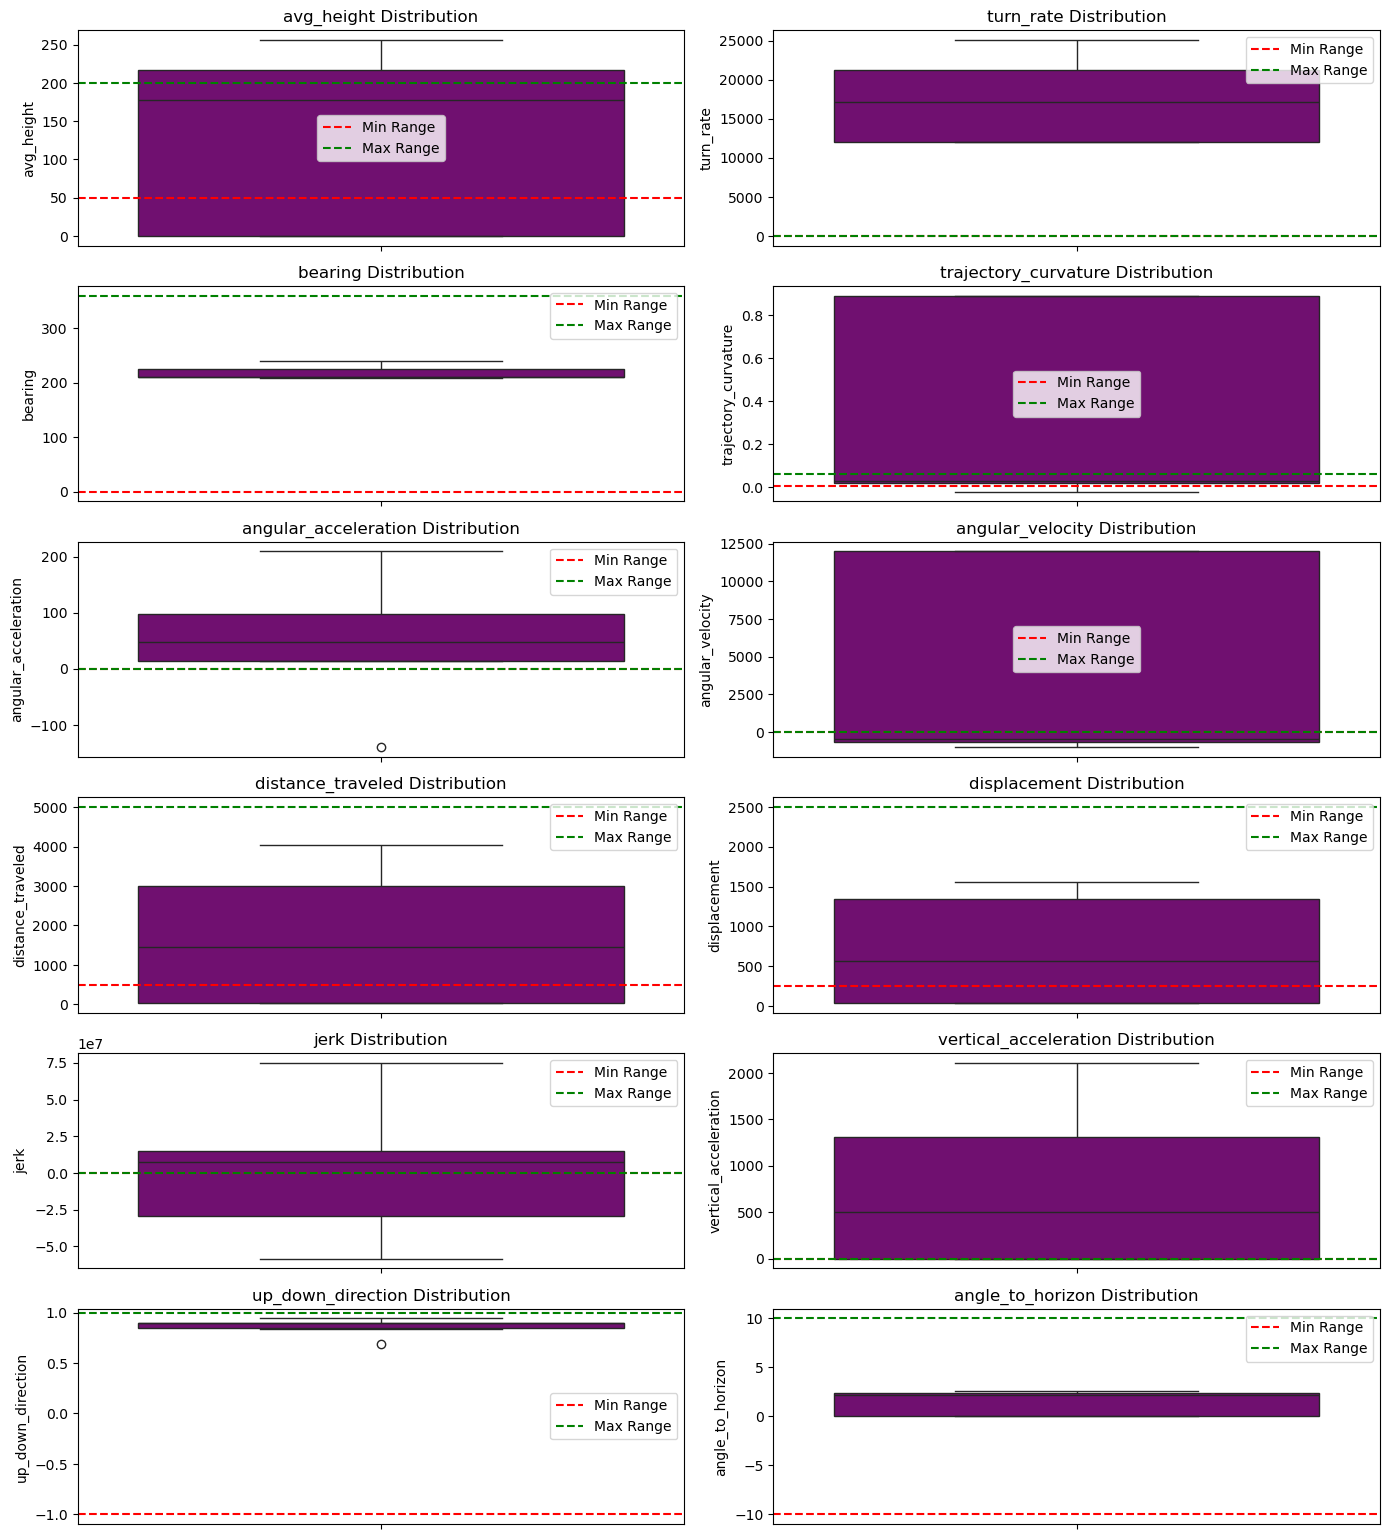

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters_with_features_df = pd.read_csv('clusters4_with_kinematic_features.csv')

# Select a subset of features to plot (e.g., first 12)
selected_features = list(homing_pigeon_ranges.items())[:12]

# Plot box plots for each feature against the range
plt.figure(figsize=(14, 18))

# Keep the grid size at 7 rows by 2 columns
for i, (feature, (min_val, max_val)) in enumerate(selected_features):
    plt.subplot(7, 2, i+1)  # Adjust the layout accordingly
    sns.boxplot(data=clusters_with_features_df,color='purple', y=feature)
    plt.axhline(y=min_val, color='red', linestyle='--', label='Min Range')
    plt.axhline(y=max_val, color='green', linestyle='--', label='Max Range')
    plt.title(f'{feature} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()


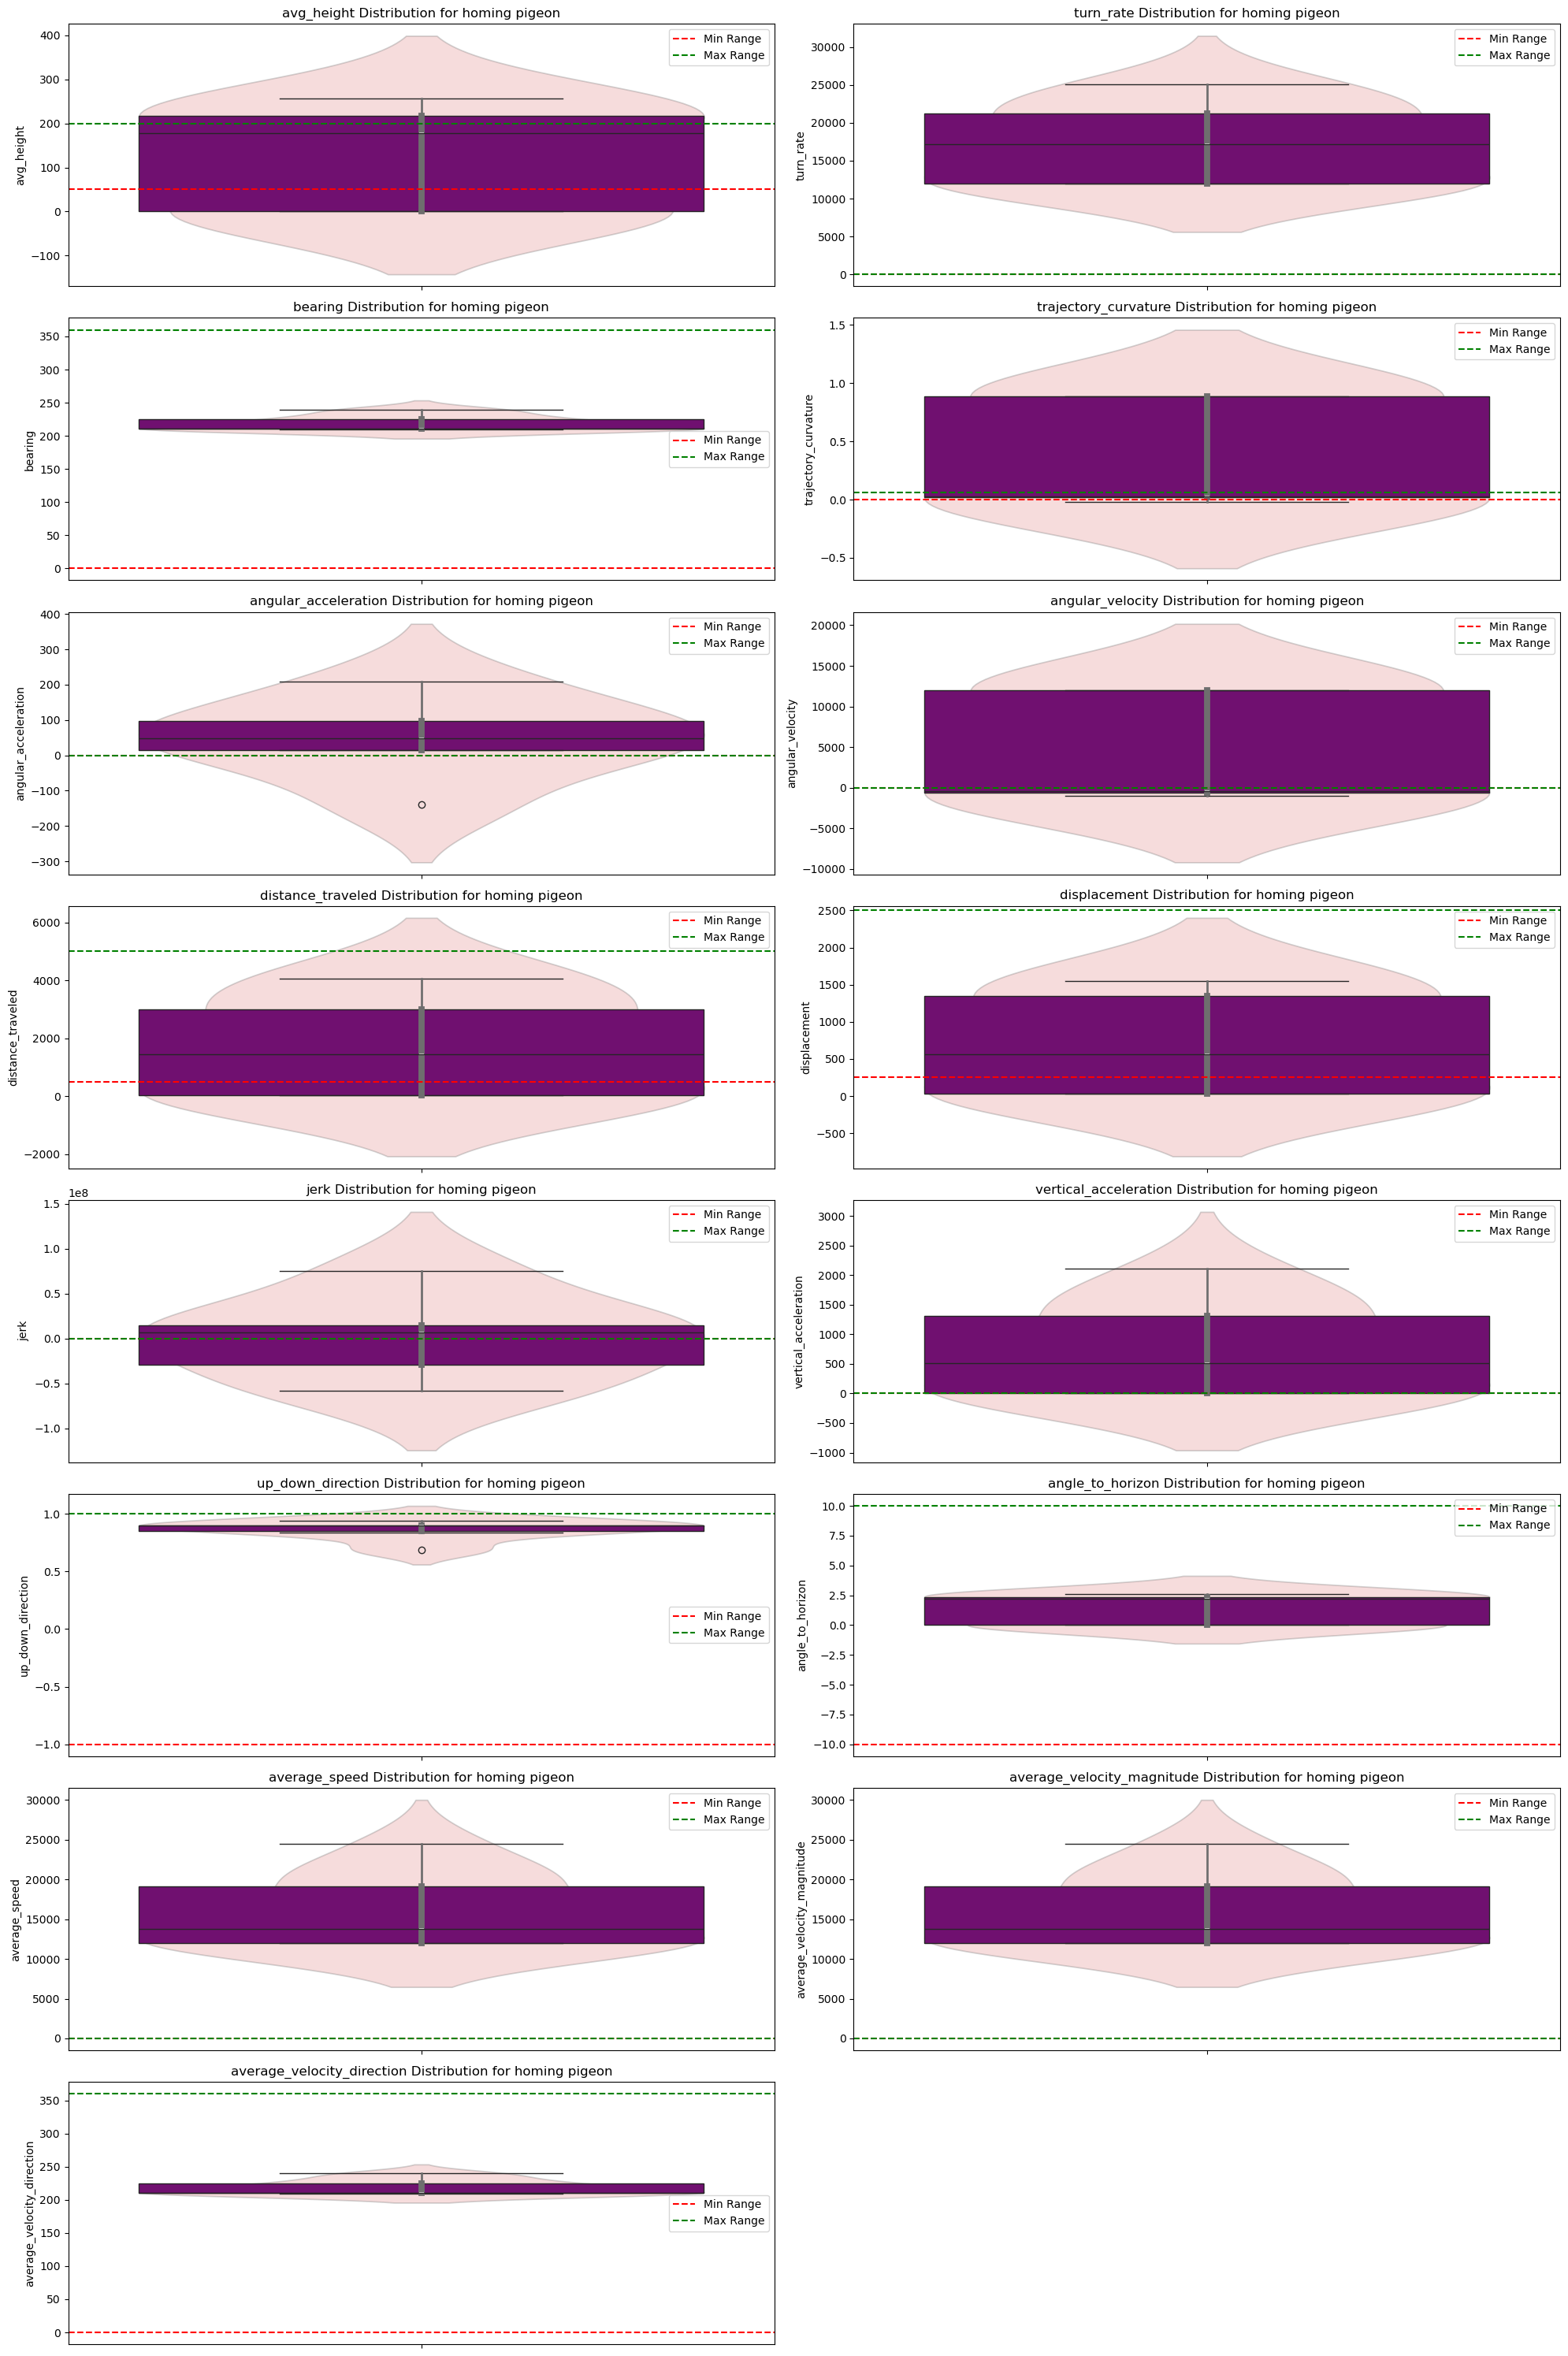

In [106]:

# Initialize the plot
fig = plt.figure(figsize=(20, 30))

# Plot box plots and violin plots for each feature
for i, (feature, (min_val, max_val)) in enumerate(homing_pigeon_ranges.items()):
    plt.subplot(8, 2, i+1)
    
    # Box plot
    sns.boxplot(data=clusters_with_features_df, y=feature, color='purple')
    
    # Violin plot (overlayed for better visualization)
    sns.violinplot(data=clusters_with_features_df, y=feature, color='lightcoral', alpha=0.3)
    
    # Add lines for min and max range
    plt.axhline(y=min_val, color='red', linestyle='--', label='Min Range')
    plt.axhline(y=max_val, color='green', linestyle='--', label='Max Range')
    
    # Title and labels
    plt.title(f'{feature} Distribution for homing pigeon')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [108]:
fig.savefig('kinematics_dist4.png', dpi=300, bbox_inches='tight')

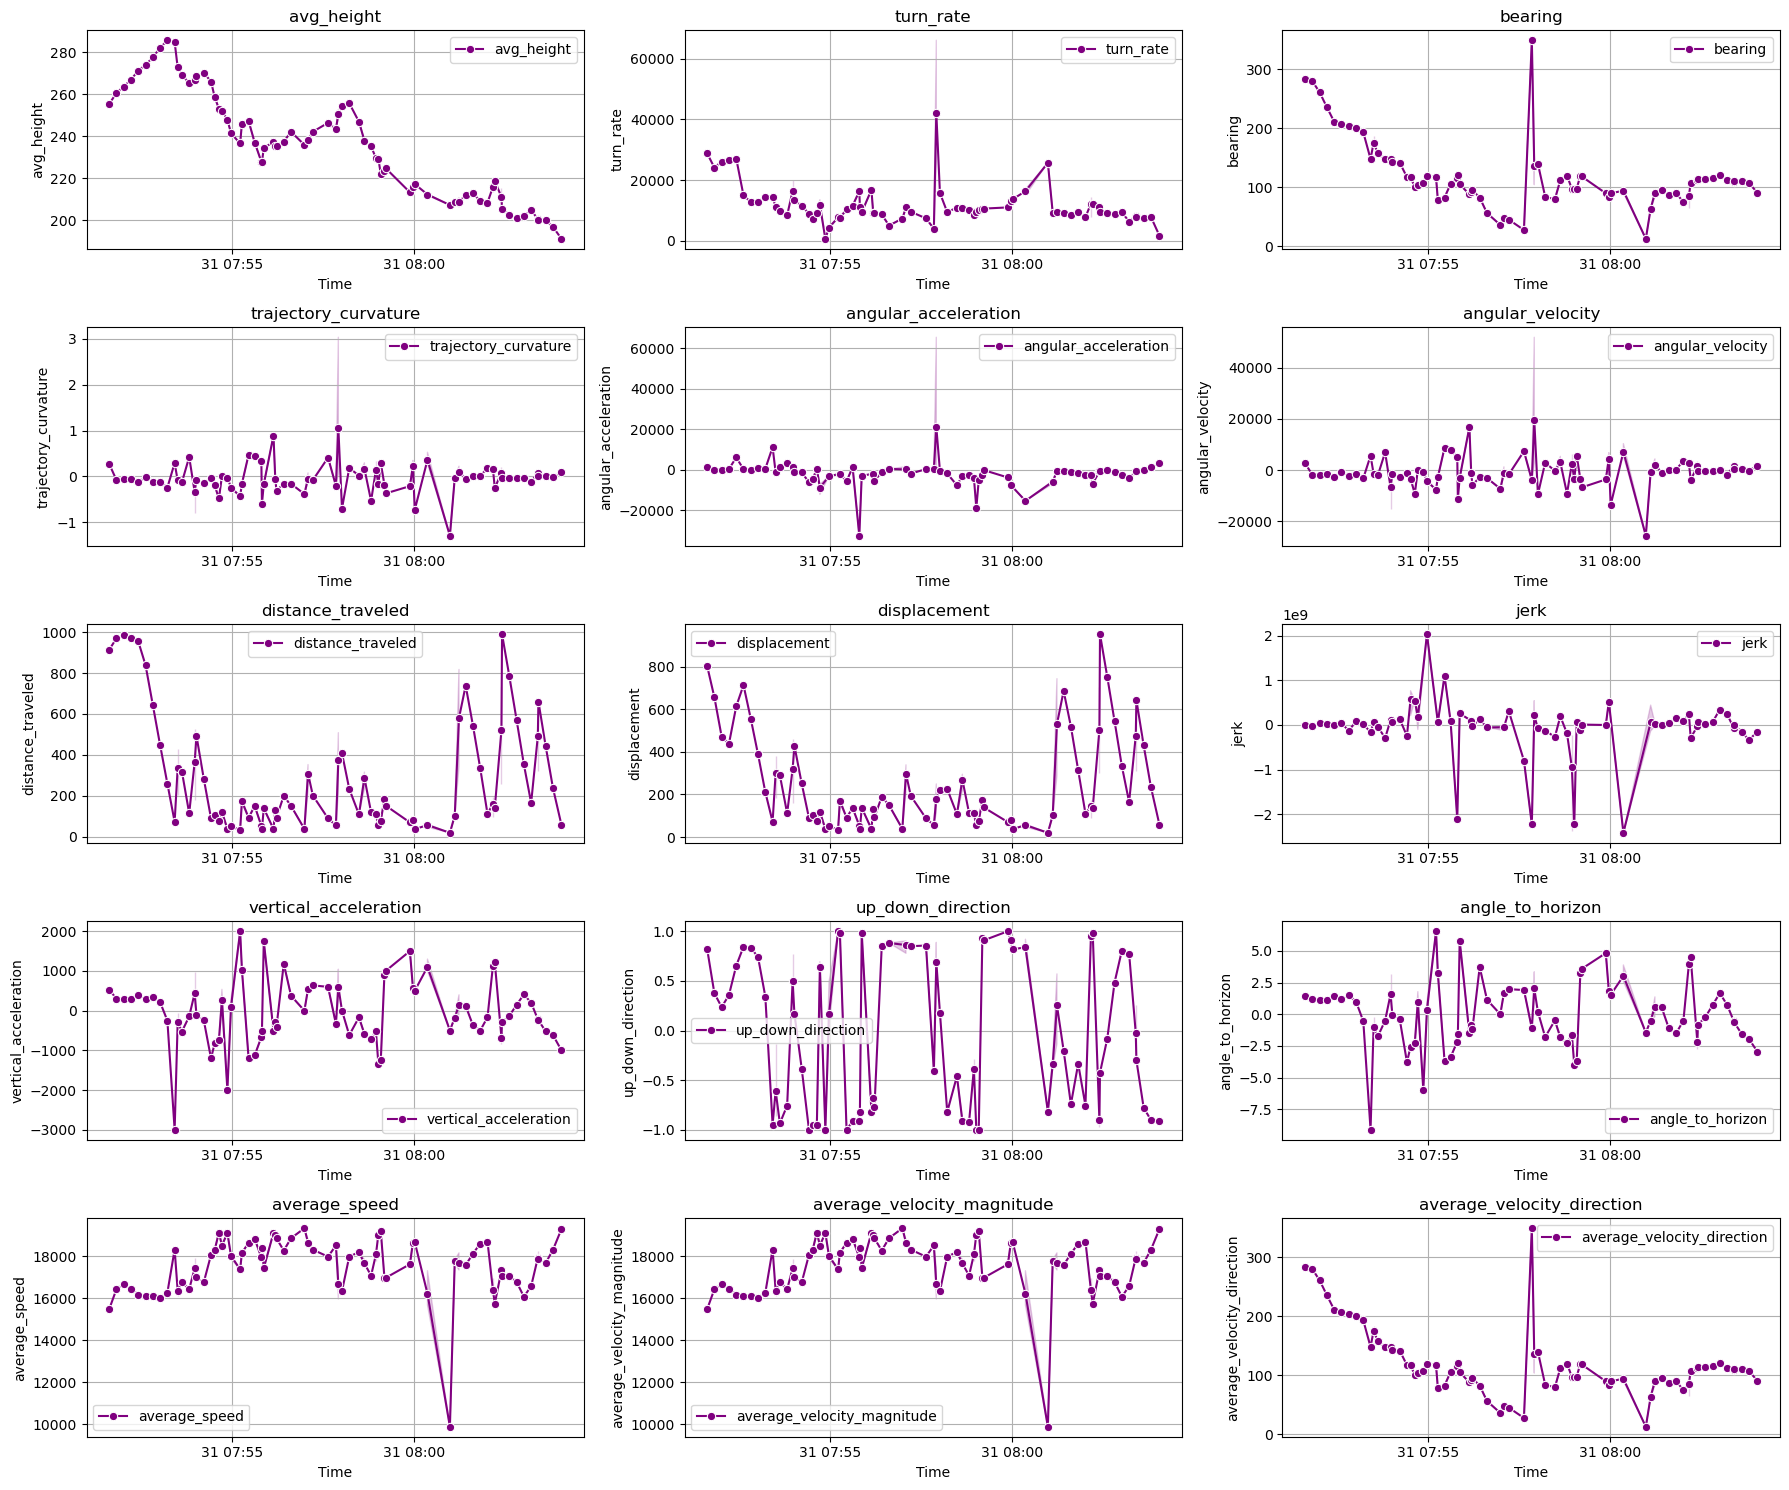

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'clusters4_with_kinematic_features.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Ensure that the timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['first_timestamp'], format='%Y-%m-%d %H:%M:%S')

# Define the kinematic parameters you want to visualize
kinematic_parameters = [
    'avg_height', 'turn_rate', 'bearing', 'trajectory_curvature',
    'angular_acceleration', 'angular_velocity', 'distance_traveled',
    'displacement', 'jerk', 'vertical_acceleration', 'up_down_direction',
    'angle_to_horizon', 'average_speed', 'average_velocity_magnitude',
    'average_velocity_direction'
]

# Create subplots with a specific layout for compactness
num_params = len(kinematic_parameters)
cols = 3  # Number of columns in the subplot grid
rows = (num_params + cols - 1) // cols  # Number of rows needed

plt.figure(figsize=(18, 15))
sns.set_palette("Set2")

for i, param in enumerate(kinematic_parameters):
    plt.subplot(rows, cols, i + 1)
    sns.lineplot(x=df['timestamp'], y=df[param], label=param,color='purple', marker="o")
    
    # Adding labels and title for each parameter
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.title(f'{param}')
    plt.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


# Poisson Regression Model

Estimate objects count in clusters using PR model

In [134]:
import pandas as pd
import statsmodels.api as sm

clusters_with_features_df = pd.read_csv('clusters4_with_kinematic_features.csv')

# Assuming clusters_with_features_df contains your data
# The number of points in each cluster is the response variable
clusters_with_features_df['number_of_points'] = clusters_with_features_df['points'].apply(len)

# Define the response variable (number of points)
y = clusters_with_features_df['number_of_points']

# Define the explanatory variables (e.g., average speed, distance traveled)
# You can select the features you want to include in the model
X = clusters_with_features_df[['average_speed', 'distance_traveled', 'avg_height']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary of the model
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       number_of_points   No. Observations:                   11
Model:                            GLM   Df Residuals:                        7
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -318.08
Date:                Fri, 16 Aug 2024   Deviance:                       539.52
Time:                        00:52:01   Pearson chi2:                     555.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5010      0.05

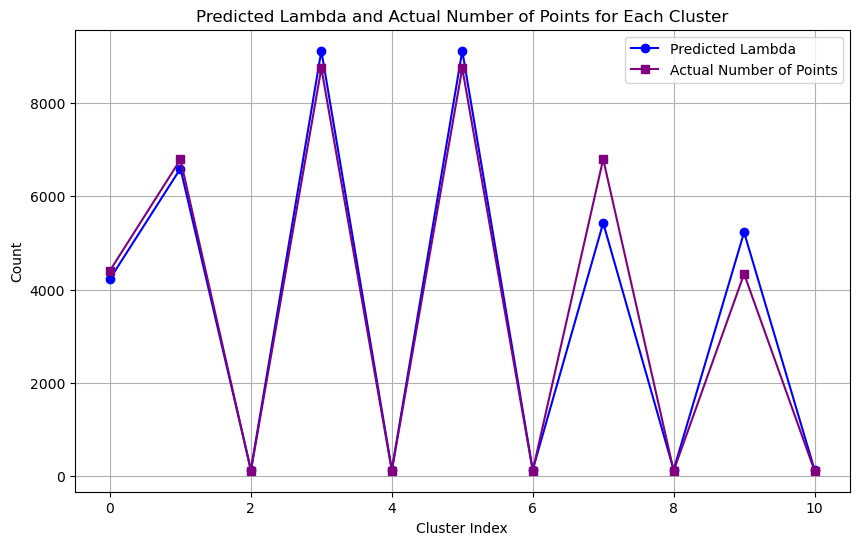

In [122]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming clusters_with_features_df contains your data
# The number of points in each cluster is the response variable
clusters_with_features_df = clusters_with_features_df.head(750)

clusters_with_features_df['number_of_points'] = clusters_with_features_df['points'].apply(len)

# Define the response variable (number of points)
y = clusters_with_features_df['number_of_points']

# Define the explanatory variables (e.g., average speed, distance traveled)
# Select features to include in the model
X = clusters_with_features_df[['average_speed', 'distance_traveled', 'avg_height']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Predict the lambda (expected number of points) for each cluster
clusters_with_features_df['predicted_lambda'] = poisson_model.predict(X)

# Plot the predicted lambda and actual number of points for each cluster
plt.figure(figsize=(10, 6))

plt.plot(clusters_with_features_df.index, clusters_with_features_df['predicted_lambda'], marker='o', linestyle='-', color='b', label='Predicted Lambda')
plt.plot(clusters_with_features_df.index, clusters_with_features_df['number_of_points'], marker='s', linestyle='-', color='purple', label='Actual Number of Points')

plt.title('Predicted Lambda and Actual Number of Points for Each Cluster')
plt.xlabel('Cluster Index')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


     window_start_time  event_count  lambda_mle  predicted_count  anomaly
0  2002-05-31 07:51:37          300  242.307692     3.903586e-05     True
1  2002-05-31 07:52:37          300  242.307692     3.903586e-05     True
2  2002-05-31 07:53:37          300  242.307692     3.903586e-05     True
3  2002-05-31 07:54:37          300  242.307692     3.903586e-05     True
4  2002-05-31 07:55:37          300  242.307692     3.903586e-05     True
5  2002-05-31 07:56:37          300  242.307692     3.903586e-05     True
6  2002-05-31 07:57:37          300  242.307692     3.903586e-05     True
7  2002-05-31 07:58:37          300  242.307692     3.903586e-05     True
9  2002-05-31 08:00:37          210  242.307692     2.881615e-03     True
10 2002-05-31 08:01:37          150  242.307692     4.626932e-11     True
11 2002-05-31 08:02:37           90  242.307692     1.542477e-29     True
12 2002-05-31 08:03:37           30  242.307692     7.489663e-67     True


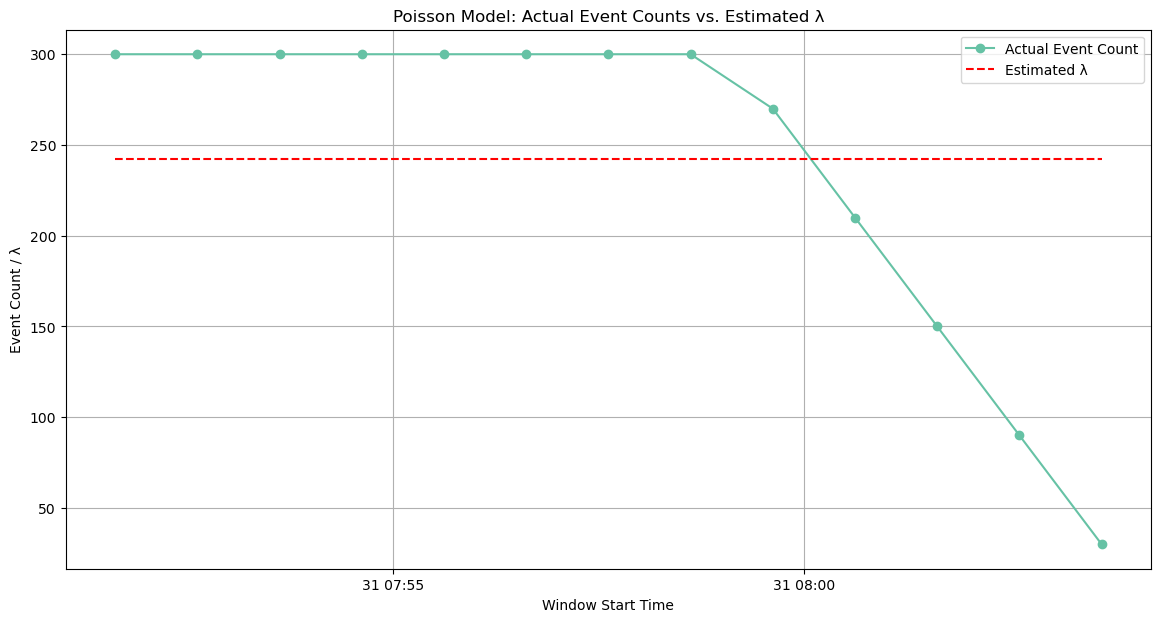

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import poisson

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(750)

# Convert epoch time in milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['epoch']*1000, unit='ms')

# Define the sliding window in seconds (e.g., 10 minutes)
window_size = 5 * 60  # 10 minutes in seconds

# Define the step size for moving the window
step_size = 1 * 60  # 2 minutes in seconds

# Initialize lists to store window start times and event counts
window_start_times = []
event_counts = []

# Iterate through the data in sliding windows
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    
    # Count the number of events (points) in the current window
    count_in_window = df[(df['timestamp'] >= start_time) & (df['timestamp'] < window_end_time)].shape[0]

    if count_in_window > 0:
        # Store the window start time and event count
        window_start_times.append(start_time)
        event_counts.append(count_in_window)
    
    # Move to the next window
    start_time = start_time + pd.Timedelta(seconds=step_size)

# Convert the lists to a DataFrame
window_df = pd.DataFrame({'window_start_time': window_start_times, 'event_count': event_counts})

# Calculate the mean event count (λ) across all windows
lambda_estimated = np.mean(event_counts)

# Validate Poisson distribution using MLE for λ
window_df['lambda_mle'] = lambda_estimated

# Calculate the predicted number of events using the Poisson distribution
window_df['predicted_count'] = poisson.pmf(window_df['event_count'], window_df['lambda_mle'])

# Identify potential anomalies where the actual count deviates significantly from the predicted count
window_df['anomaly'] = window_df.apply(lambda row: np.abs(row['event_count'] - row['lambda_mle']) > 2*np.sqrt(row['lambda_mle']), axis=1)

# Print the windows identified as anomalies
anomalies = window_df[window_df['anomaly']]
print(anomalies)

# Plot the actual event counts and the estimated λ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(window_df['window_start_time'], window_df['event_count'], label='Actual Event Count', marker='o')
plt.plot(window_df['window_start_time'], window_df['lambda_mle'], label='Estimated λ', linestyle='--', color='r')
plt.title('Poisson Model: Actual Event Counts vs. Estimated λ')
plt.xlabel('Window Start Time')
plt.ylabel('Event Count / λ')
plt.legend()
plt.grid(True)
plt.show()


The analysis identified anomalies in time intervals where the actual event count significantly deviated from the expected number based on the Poisson distribution. In this context, an anomaly was defined as a time window where the event count was more than two standard deviations away from the mean count (λ). The plot visually highlights these anomalies as red 'x' marks.

A total of 3,596 time intervals were flagged as anomalies, indicating periods where the bird movements deviated from what the model expected. This suggests that during these periods, either more or fewer birds were detected than anticipated, which could be due to various factors such as unusual bird behavior, environmental changes, or errors in data collection.

The time intervals with detected anomalies can be further investigated to understand the underlying causes and assess whether these deviations indicate significant events or patterns

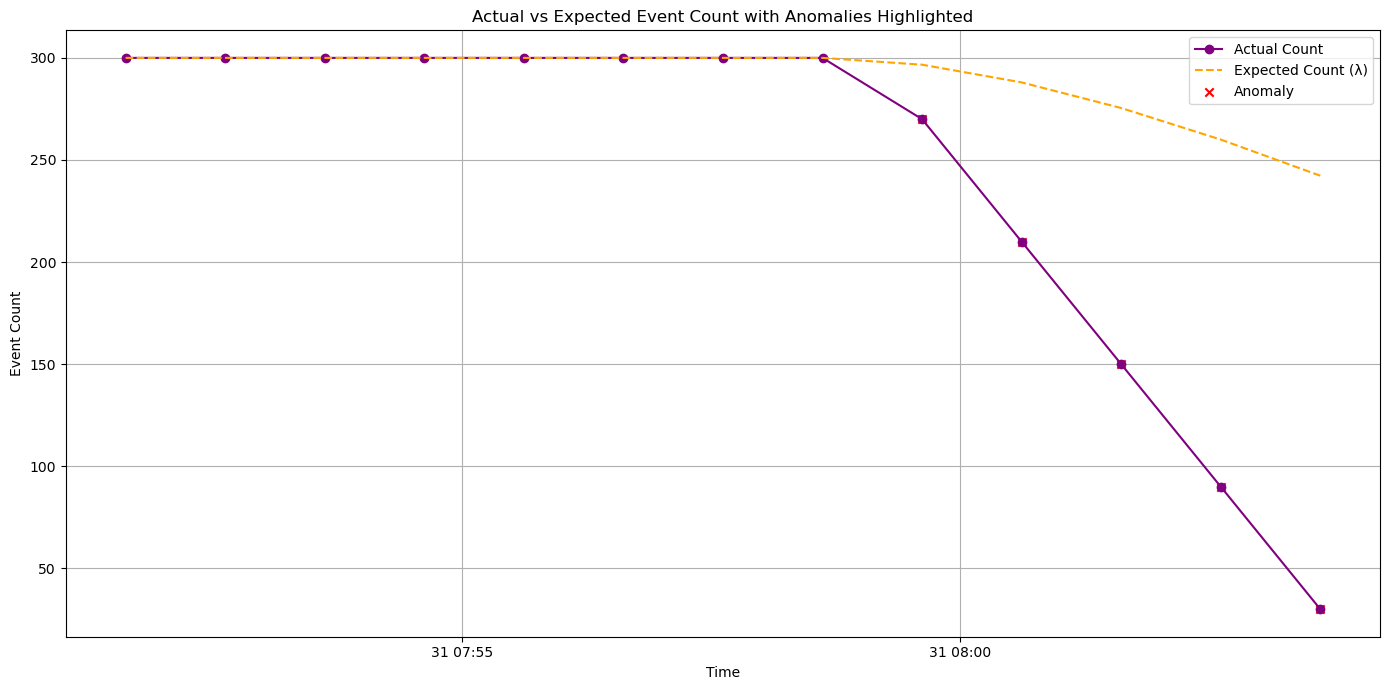

Anomalous time intervals:
          window_start  actual_count  expected_count  anomaly
8  2002-05-31 07:59:37           270      296.666667     True
9  2002-05-31 08:00:37           210      288.000000     True
10 2002-05-31 08:01:37           150      275.454545     True
11 2002-05-31 08:02:37            90      260.000000     True
12 2002-05-31 08:03:37            30      242.307692     True


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'homing_pigeons_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)
df = df.head(750)

# Convert timestamp column to datetime and sort the dataframe
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window size and step size in seconds
window_size = 5 * 60  # 60 minutes
step_size = 1 * 60  # 20 minutes

# Function to calculate lambda (average rate of events)
def calculate_lambda(event_counts):
    return np.mean(event_counts)

# Initialize lists to store results
window_starts = []
actual_counts = []
expected_counts = []
anomalies = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    
    # Calculate the number of events (points) in the current window
    event_count = len(window_df)
    if event_count > 0:
        actual_counts.append(event_count)
    
        # Calculate the expected number of events (λ) for this window
        lambda_value = calculate_lambda(actual_counts)
        expected_counts.append(lambda_value)
    
        # Calculate standard deviation for anomaly detection
        std_dev = np.std(actual_counts)
        
        # Identify anomalies where the actual count deviates significantly from the expected count
        if abs(event_count - lambda_value) > 2 * std_dev:
            anomalies.append(True)
        else:
            anomalies.append(False)
    
        window_starts.append(start_time)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'window_start': window_starts,
    'actual_count': actual_counts,
    'expected_count': expected_counts,
    'anomaly': anomalies
})

# Plot the actual vs expected counts with anomalies highlighted
plt.figure(figsize=(14, 7))
plt.plot(results_df['window_start'], results_df['actual_count'], marker='o', linestyle='-', color='purple', label='Actual Count')
plt.plot(results_df['window_start'], results_df['expected_count'], linestyle='--', color='orange', label='Expected Count (λ)')
plt.scatter(results_df[results_df['anomaly']]['window_start'], results_df[results_df['anomaly']]['actual_count'], color='red', label='Anomaly', marker='x')
plt.xlabel('Time')
plt.ylabel('Event Count')
plt.title('Actual vs Expected Event Count with Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the DataFrame showing where anomalies occurred
print("Anomalous time intervals:")
print(results_df[results_df['anomaly']])
